# Exploratory Data Analysis and Data Cleaning

**In this notebook, I will:**
1. Understand the summary statistics and current state of data
2. Understand all the Numerical Variables
3. Understand the ditribution of all numerical variables
4. Handle categorical variables with make_dummy
5. Cardinality of categorical variables
6. Find the outliers
7. Combine required features together

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in train data
df = pd.read_csv('../datasets/train.csv') 

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_20735/1787964209.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/train.csv')


In [3]:
# read in test data
df_pred = pd.read_csv('../datasets/test.csv')

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_20735/1473992403.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pred = pd.read_csv('./datasets/test.csv')


In [4]:
# find out the shape of the data
print(df.shape)

(150634, 78)


In [5]:
print(df_pred.shape) # one less column on resale_price

(16737, 77)


In [6]:
# display all columns
pd.set_option('display.max_columns', None)
df.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   
1       34              9            1987           Y          N   
2       24             16            1996           Y          N   
3       29             11            1990           Y          Y   
4       34              4            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          96          46          0   
1           0           0           0          56          56          0   
2           0           0           0           0          30         60   
3           0           0           0          68           7          0   
4           0           0           0          30          18          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  382003  1.314299  103.872828   
1             0                  0  570153  1.346086  103.855078   
2             0                  0  651289  1.343867  103.760535   
3             0                  0  570232  1.358245  103.845504   
4             0                  0  760876  1.414745  103.835532   

  

In [7]:
df.info() # find out the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [8]:
df_pred.info() # find out the data types for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [9]:
# find out the features with missing values
pd.set_option('display.max_rows', None)
df.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion   

In [10]:
# find out the missing values from prediction data
df_pred.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

<AxesSubplot: >

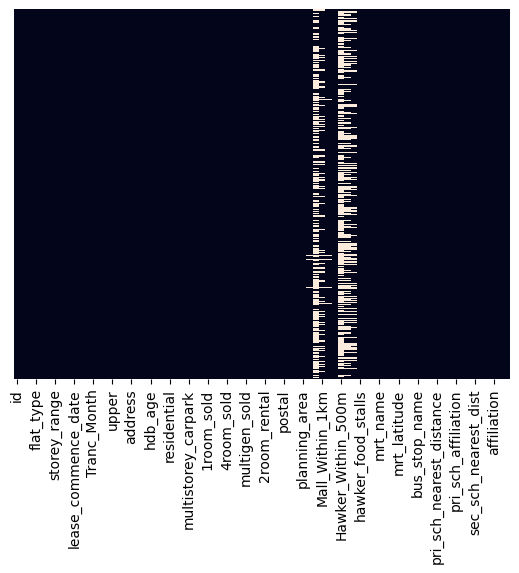

In [11]:
# visualizing the null values on train data
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

<AxesSubplot: >

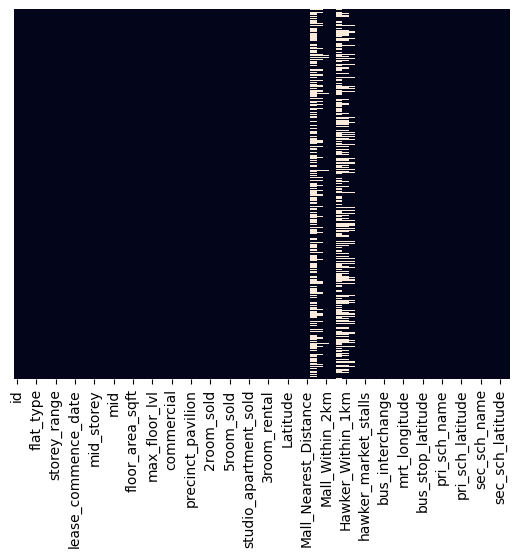

In [12]:
# visualizing the null values on test data
sns.heatmap(df_pred.isnull(),yticklabels=False, cbar=False)

## Data cleaning
In this section, I will deal with missing values by dropping or imputing with the suitable values

#### Missing Values

Find out the missing values in the data and its relationship with resale_price, and perform imputation/drop accordingly

In [13]:
# check out percentage of null values for each feature with missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

Mall_Nearest_Distance 0.0055 % missing values
Mall_Within_500m 0.616 % missing values
Mall_Within_1km 0.1688 % missing values
Mall_Within_2km 0.0129 % missing values
Hawker_Within_500m 0.6465 % missing values
Hawker_Within_1km 0.4041 % missing values
Hawker_Within_2km 0.1939 % missing values


In [14]:
# same for df_pred
features_with_na = [features for features in df_pred.columns if df_pred[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df_pred[feature].isnull().mean(), 4), '% missing values')

Mall_Nearest_Distance 0.005 % missing values
Mall_Within_500m 0.6149 % missing values
Mall_Within_1km 0.1665 % missing values
Mall_Within_2km 0.0127 % missing values
Hawker_Within_500m 0.6426 % missing values
Hawker_Within_1km 0.402 % missing values
Hawker_Within_2km 0.1944 % missing values


**Observations**
1. It looks like the values with the highest percentages are Mall_within_500m and Hawker_Within_500m
2. Since there are some missing values, we will examine if the missing values have any relationship with y value (resale price)

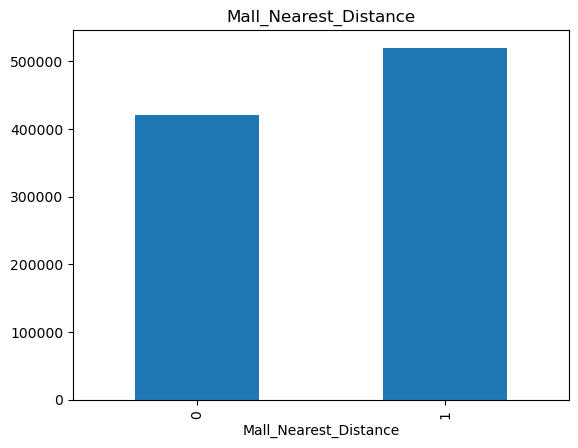

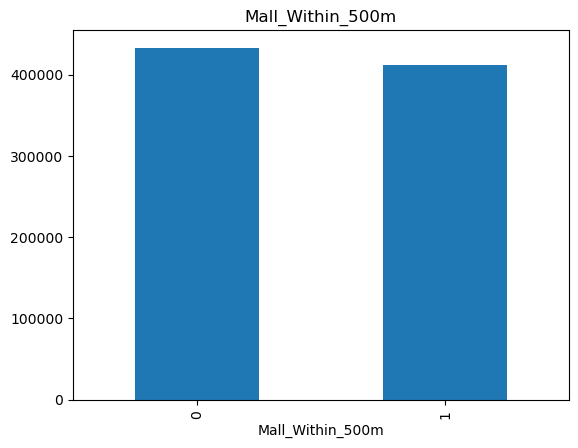

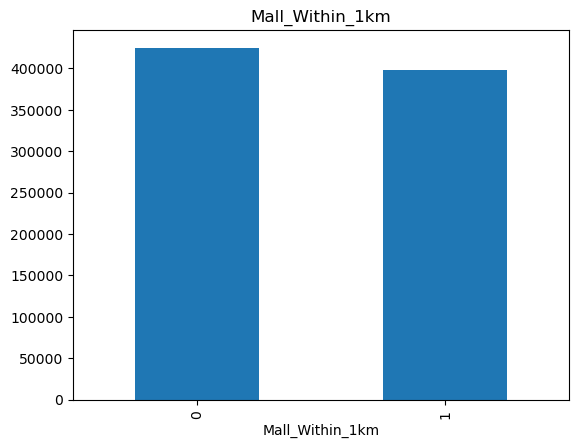

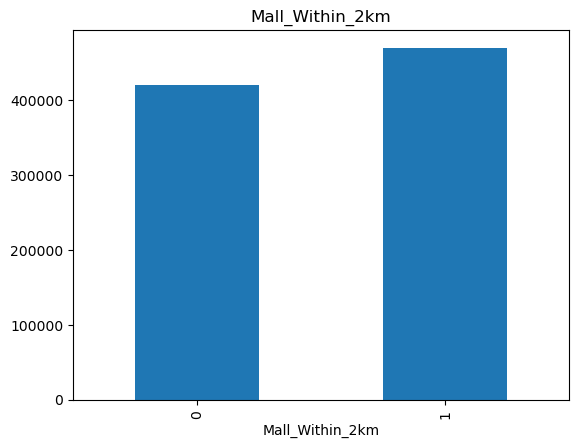

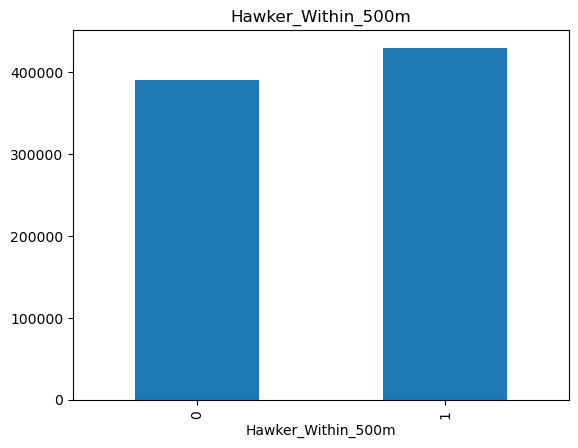

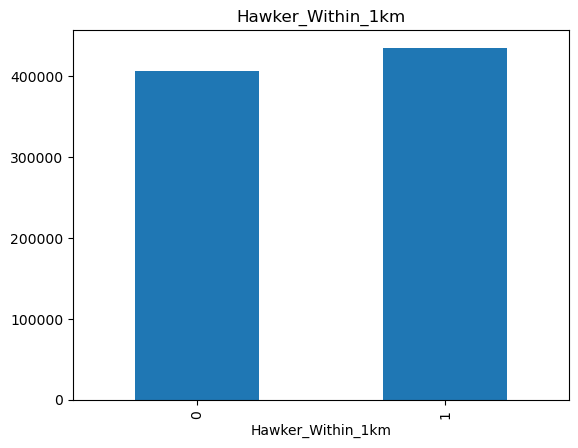

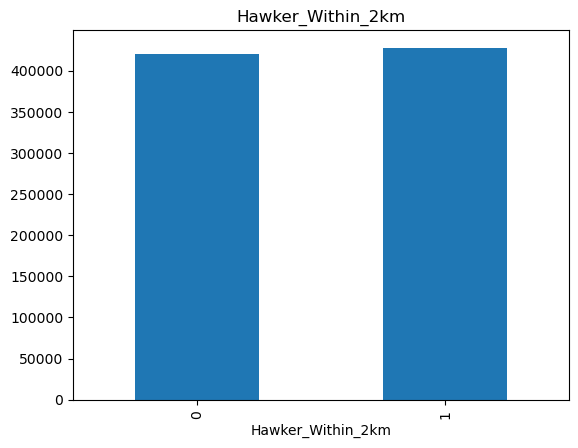

In [15]:
# find out the missing values' relationship with resale prices

for feature in features_with_na:
    data = df.copy() # make a dataset copy
    
    # make variable that indicates 1 if observation was missing 
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # if there are a lot of missing values, whether the sales price will increase
    data.groupby(feature)['resale_price'].median().plot.bar()
    plt.title(feature)
    plt.show()

**Observations** 
1. The relationship between the missing values for mall_nearest_distance is large. I will need to impute this data with either mean, mode, or median.
2. There is not much effect of the missing values for Mall_Within_500m and Hawker_Within_500m on resale_price. I will drop these two features, which also have the highest percentage of null values
3. The relationship with the rest of the variables are not clear. I will drop the rest of the features as well

In [16]:
# drop columns with null values, and has no relationship with resale value

df = df.drop(columns = ['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km'])

In [17]:
# same for pred columns
df_pred = df_pred.drop(columns = ['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km'])

In [18]:
# to find out the suitable data for imputation for mall_nearest_distance
df['Mall_Nearest_Distance'].mode()

# mode = 1252.5m

0    1252.549574
Name: Mall_Nearest_Distance, dtype: float64

In [19]:
df['Mall_Nearest_Distance'].median()

# median - 602.82m

602.8183882

In [20]:
df['Mall_Nearest_Distance'].mean()

# mean - 664.23m

664.2398262895447

Text(0.5, 1.0, 'Distribution of Distance to Nearest Mall')

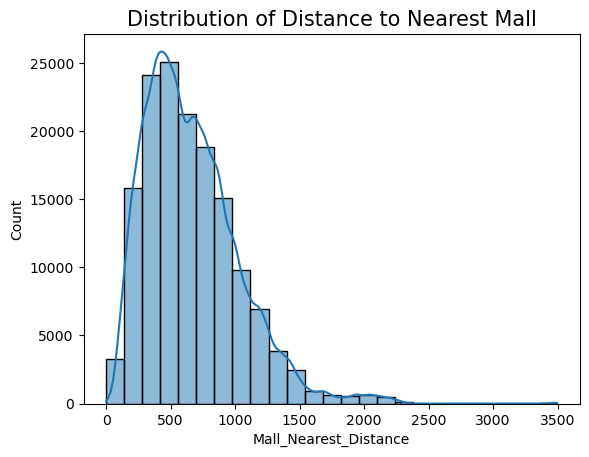

In [21]:
# observe the distribution of mall_nearest distance
sns.histplot(data=df, x='Mall_Nearest_Distance', bins =25, kde=True)
plt.title('Distribution of Distance to Nearest Mall', fontsize=15)

# the distribution is skewed to the right. The values looks like a missing-at-random case
# we can impute it with either mean, or median

In [22]:
# difference between mean and median is about 60m, not too significant
# Will fill missing data with median, since it is realistic to assume that most HDBs are designed to be close to amenities 
df['Mall_Nearest_Distance'] = df['Mall_Nearest_Distance'].fillna(df['Mall_Nearest_Distance'].median())

In [23]:
# fill in missing data with train_data's median, to prevent data leakage
df_pred['Mall_Nearest_Distance'] = df_pred['Mall_Nearest_Distance'].fillna(df['Mall_Nearest_Distance'].median())

<AxesSubplot: >

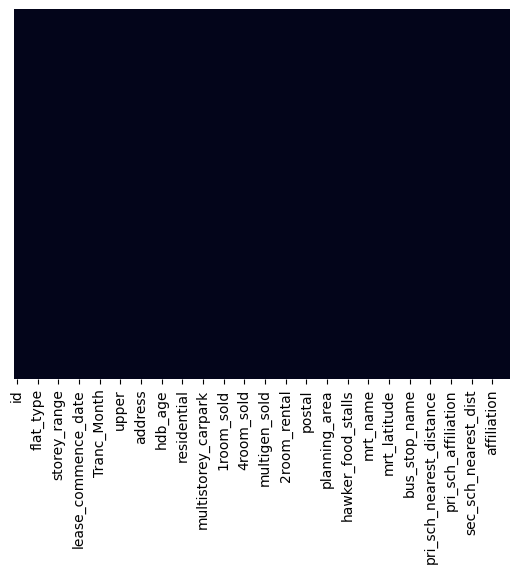

In [26]:
# check if all null values has been imputed
pd.set_option('display.max_columns', None)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot: >

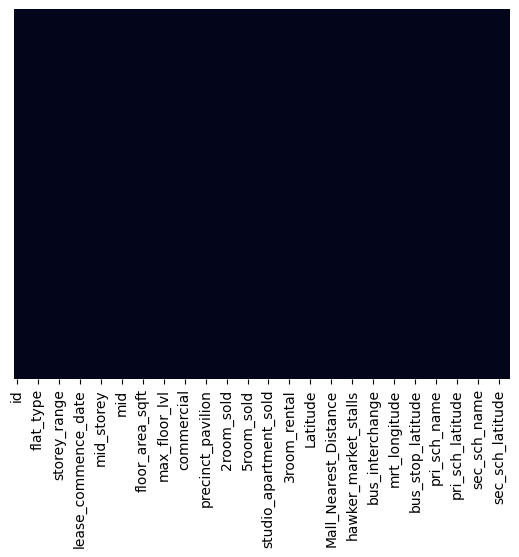

In [27]:
# check if all null values have been imputed
pd.set_option('display.max_columns', None)
sns.heatmap(df_pred.isnull(),yticklabels=False,cbar=False)

**Observation:**
After dropping and imputing, there is no missing values for the numerical data

## Numerical Variables

In [28]:
# find out the numerical variables the list of features
numerical_features = [features for features in df.columns if df[features].dtype != 'O']

In [29]:
# print out the numerical variables

print('Number of numerical variables: ', len(numerical_features))
pd.set_option('display.max_columns', None)
df[numerical_features].head()

Number of numerical variables:  52


id  floor_area_sqm  lease_commence_date  resale_price  Tranc_Year  \
0   88471            90.0                 2006      680000.0        2016   
1  122598           130.0                 1987      665000.0        2012   
2  170897           144.0                 1997      838000.0        2013   
3   86070           103.0                 1992      550000.0        2012   
4  153632            83.0                 1987      298000.0        2017   

   Tranc_Month  mid_storey  lower  upper  mid  floor_area_sqft  \
0            5          11     10     12   11          968.760   
1            7           8      7      9    8         1399.320   
2            7          14     13     15   14         1550.016   
3            4           3      1      5    3         1108.692   
4           12           2      1      3    2          893.412   

   price_per_sqft  hdb_age  max_floor_lvl  year_completed  \
0      701.928238       15             25            2005   
1      475.230826       34              9            1987   
2      540.639580       24             16            1996   
3      496.080066       29             11            1990   
4      333.552717       34              4            1987   

   total_dwelling_units  1room_sold  2room_sold  3room_sold  4room_sold  \
0                   142           0           0           0          96   
1                   112           0           0           0          56   
2                    90           0           0           0           0   
3                    75           0           0           0          68   
4                    48           0           0           0          30   

   5room_sold  exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
0          46          0              0                      0             0   
1          56          0              0                      0             0   
2          30         60              0                      0             0   
3           7          0              0                      0             0   
4          18          0              0                      0             0   

   2room_rental  3room_rental  other_room_rental  Latitude   Longitude  \
0             0             0                  0  1.314299  103.872828   
1             0             0                  0  1.346086  103.855078   
2             0             0                  0  1.343867  103.760535   
3             0             0                  0  1.358245  103.845504   
4             0             0                  0  1.414745  103.835532   

   Mall_Nearest_Distance  Hawker_Nearest_Distance  hawker_food_stalls  \
0            1094.090418               154.753357                  84   
1             866.941448               640.151925                  80   
2            1459.579948              1762.082341                  84   
3             950.175199               726.215262                  32   
4             729.771895              1540.151439                  45   

   hawker_market_stalls  mrt_nearest_distance  bus_interchange  \
0                    60            330.083069                0   
1                    77            903.659703                1   
2                    95           1334.251197                1   
3                    86            907.453484                1   
4                     0            412.343032                0   

   mrt_interchange  mrt_latitude  mrt_longitude  bus_stop_nearest_distance  \
0                0      1.311540     103.871731                  29.427395   
1                1      1.350580     103.848305                  58.207761   
2                0      1.349561     103.749970                 214.747860   
3                1      1.350580     103.848305                  43.396521   
4                0      1.417131     103.832692                 129.422752   

   bus_stop_latitude  bus_stop_longitude  pri_sch_nearest_distance  vacancy  \
0           1.314433     

**Observation:**
There are 52 numerical variables
* I will separate it into Discrete and Continuous Variables
* I will use 120 as the unique values to sieve out discrete variables. 
* this may not capture all the discrete variables, so I will need to eyeball and remove disrete variables with too many unique values later as it will not make sense to do one-hot encoding on such features

### Discrete Variables

In [30]:
# assume that discrete features are those with less than 120 unique values
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<120]
print('Discrete Variables Count:{}'.format(len(discrete_feature)))

Discrete Variables Count:29


In [31]:
# Print out the 29 discrete variables
discrete_feature

['lease_commence_date',
 'Tranc_Year',
 'Tranc_Month',
 'mid_storey',
 'lower',
 'upper',
 'mid',
 'hdb_age',
 'max_floor_lvl',
 'year_completed',
 '1room_sold',
 '2room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 '1room_rental',
 '2room_rental',
 '3room_rental',
 'other_room_rental',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'bus_interchange',
 'mrt_interchange',
 'mrt_latitude',
 'mrt_longitude',
 'vacancy',
 'pri_sch_affiliation',
 'cutoff_point',
 'affiliation']

lease_commence_date


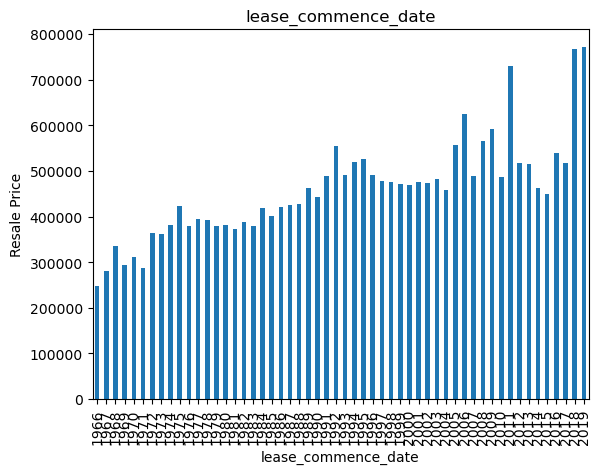

Tranc_Year


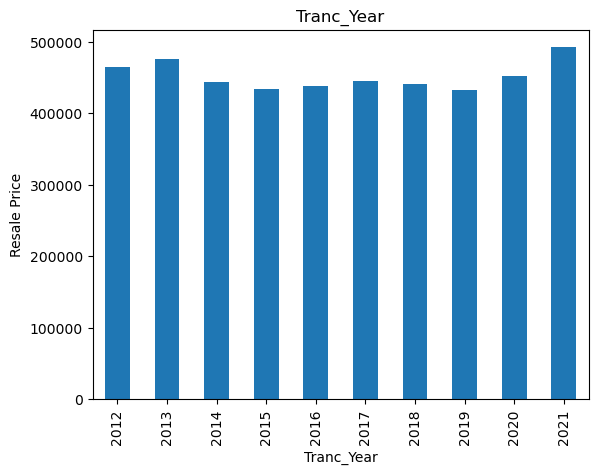

Tranc_Month


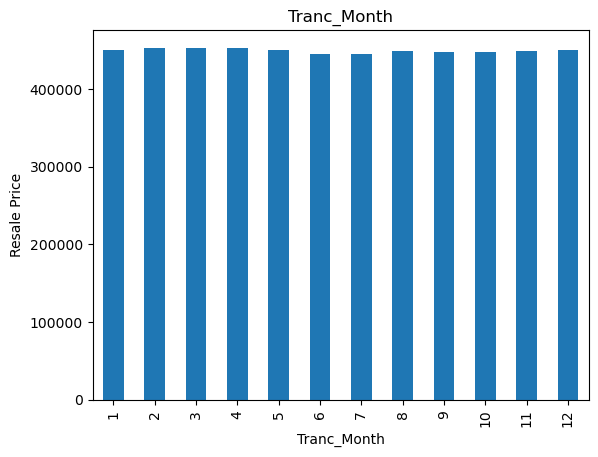

mid_storey


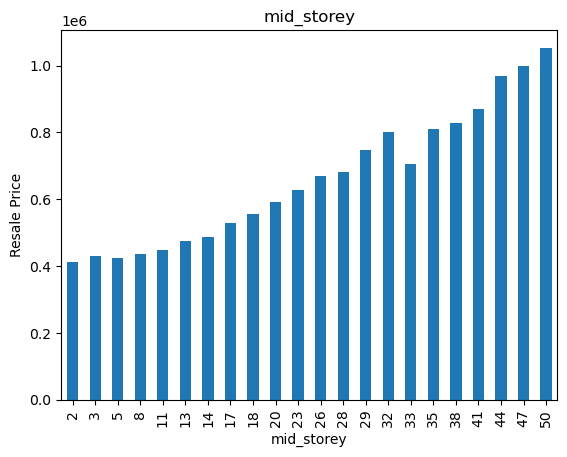

lower


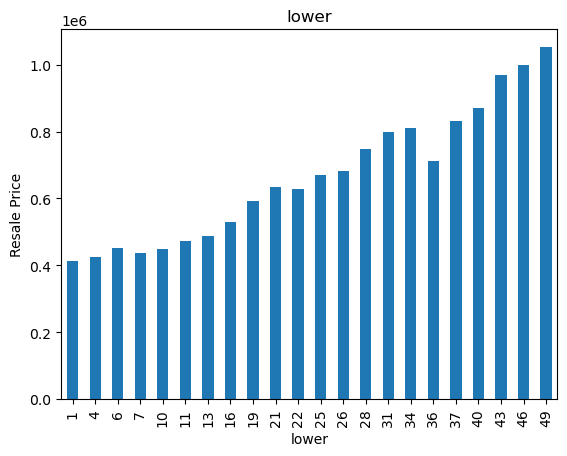

upper


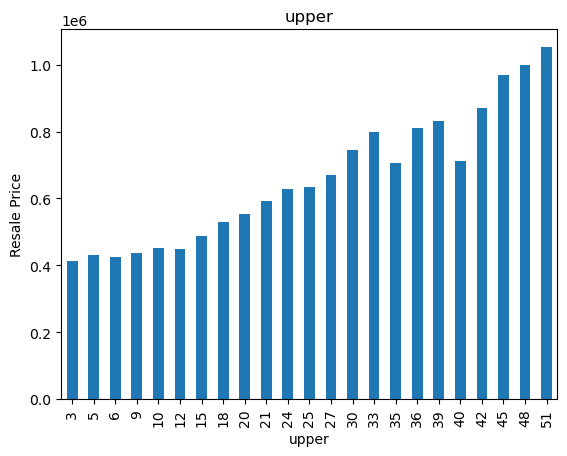

mid


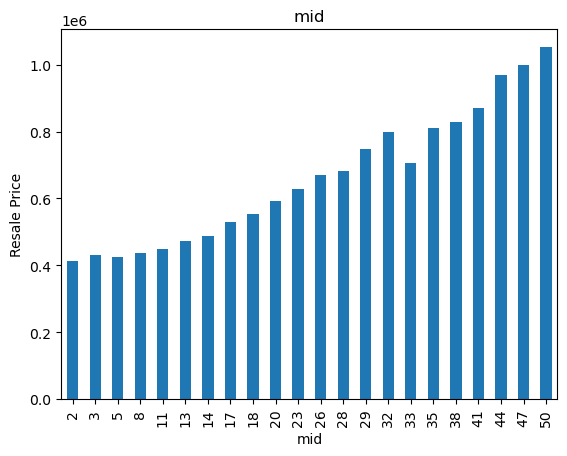

hdb_age


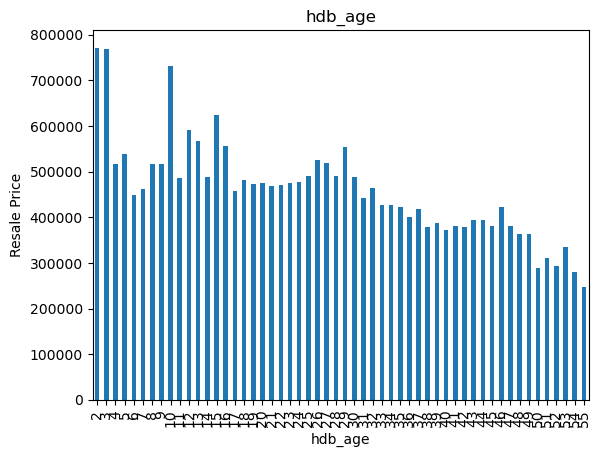

max_floor_lvl


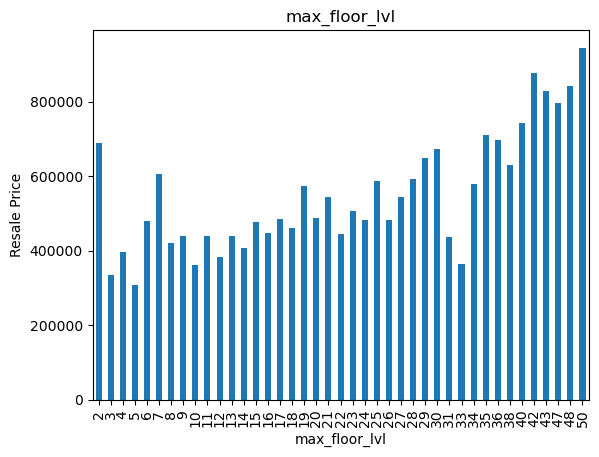

year_completed


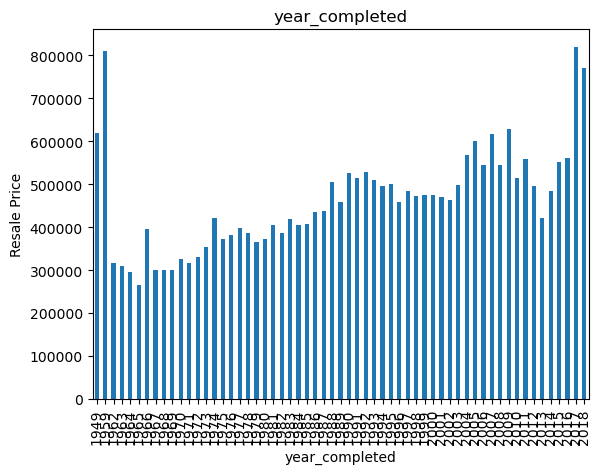

1room_sold


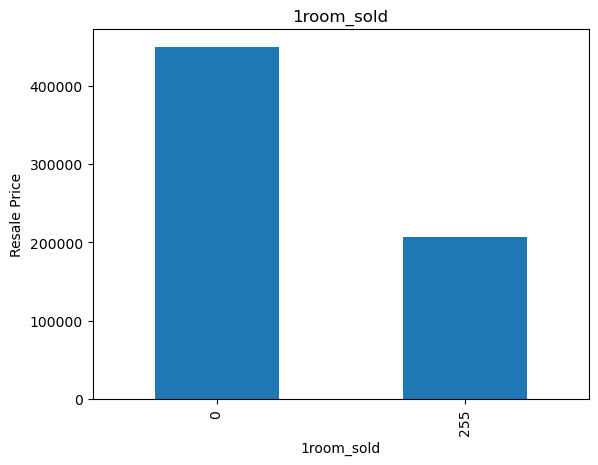

2room_sold


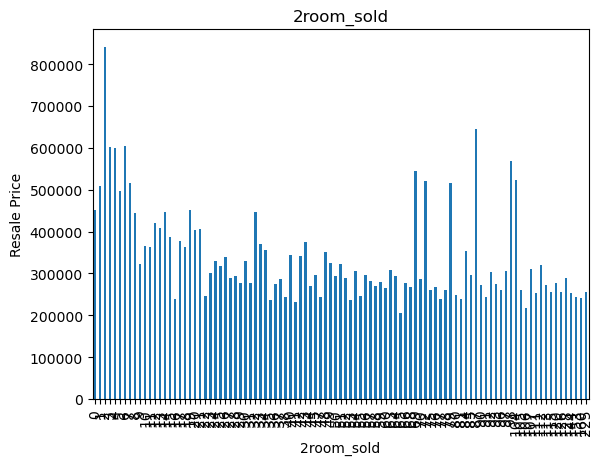

exec_sold


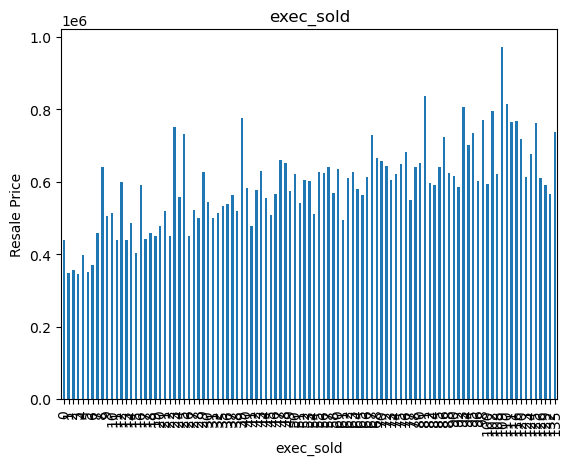

multigen_sold


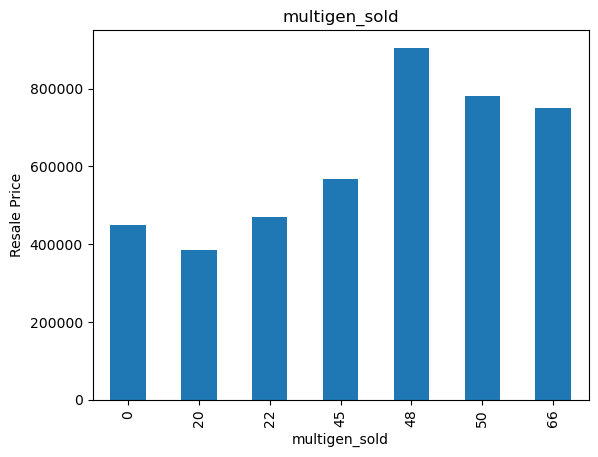

studio_apartment_sold


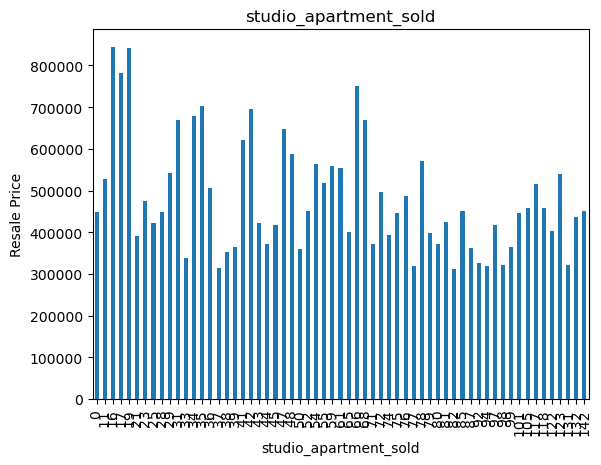

1room_rental


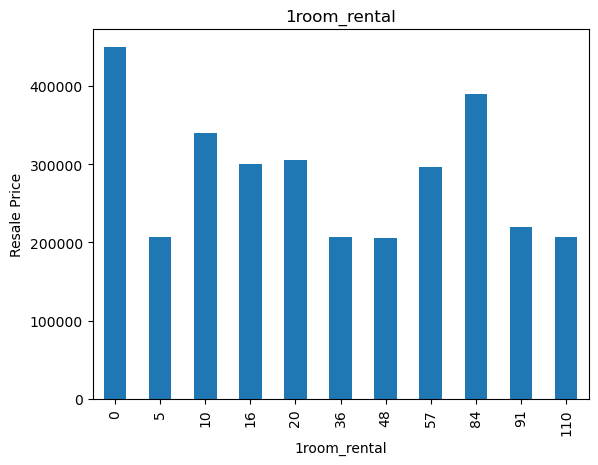

2room_rental


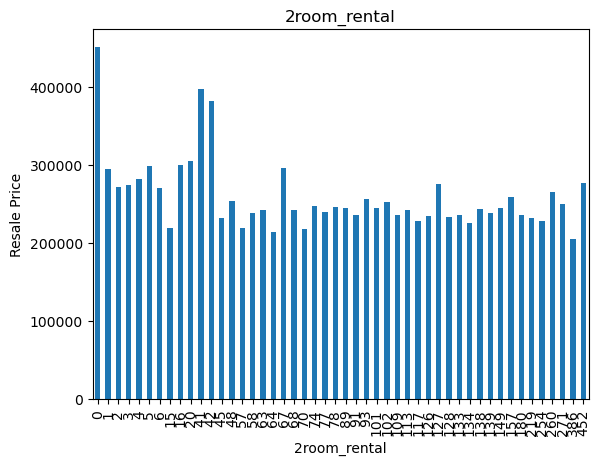

3room_rental


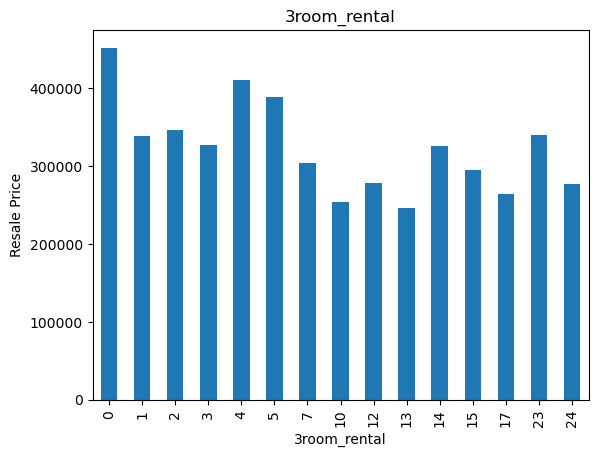

other_room_rental


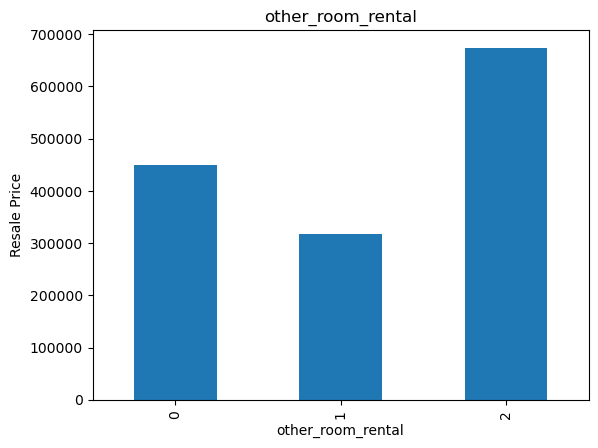

hawker_food_stalls


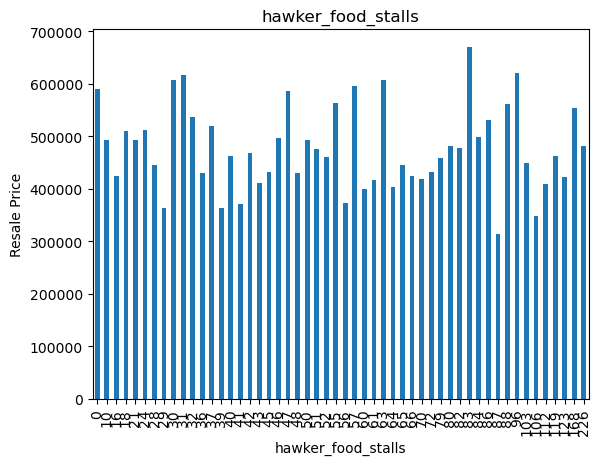

hawker_market_stalls


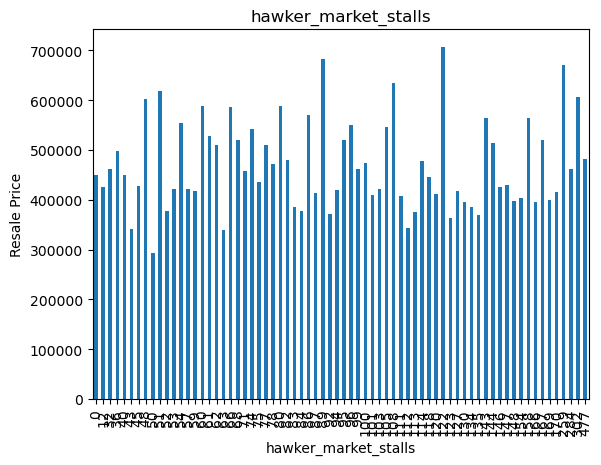

bus_interchange


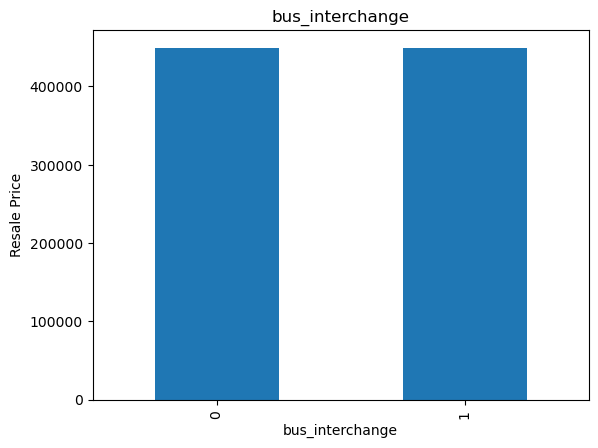

mrt_interchange


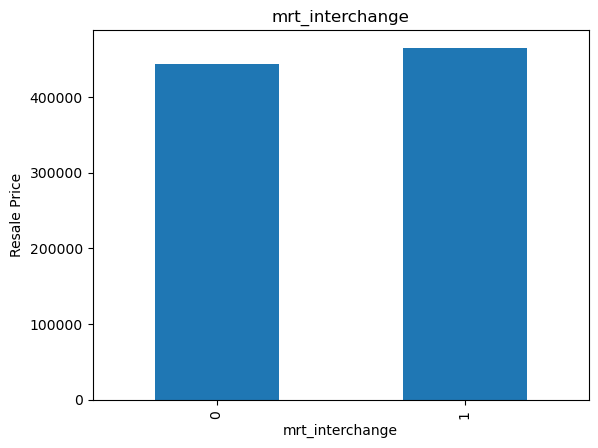

mrt_latitude


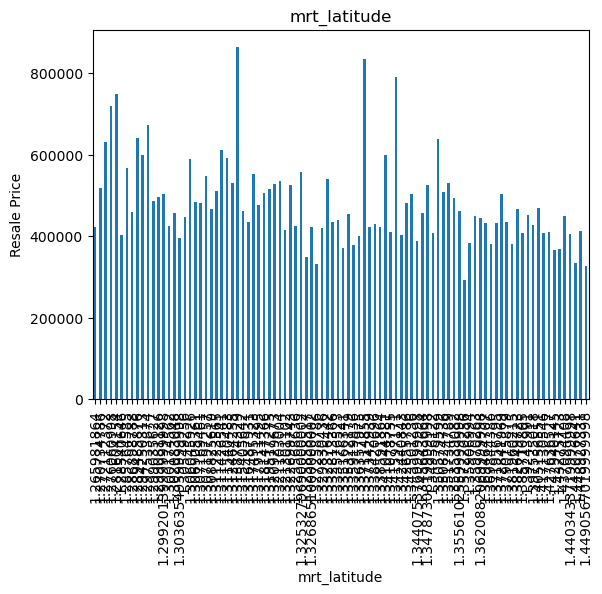

mrt_longitude


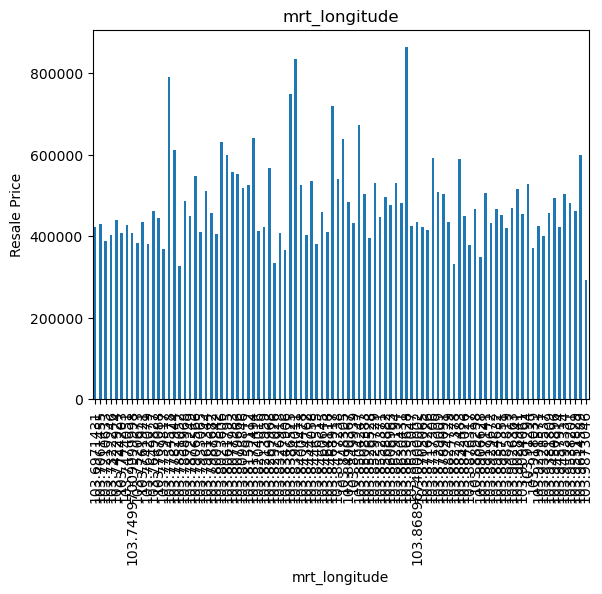

vacancy


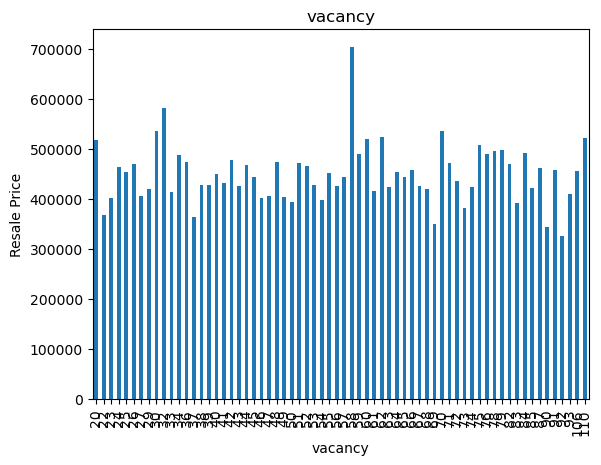

pri_sch_affiliation


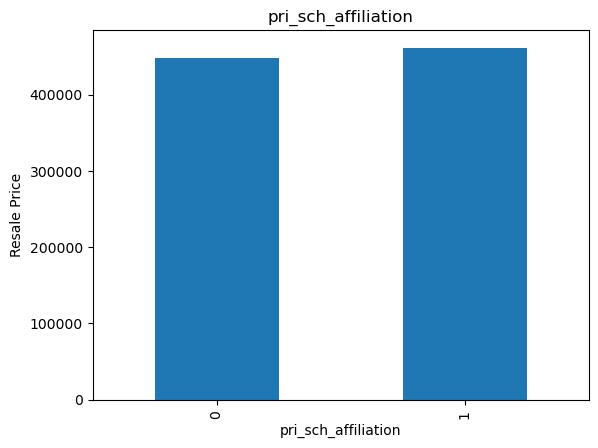

cutoff_point


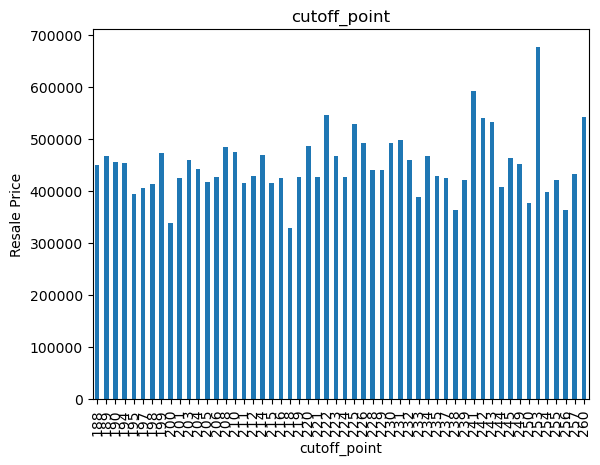

affiliation


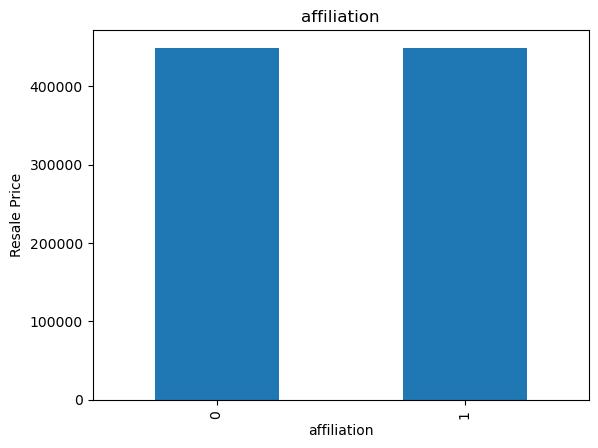

In [32]:
# find out the relationship between the mean for the 29 discrete variables and resale_price
# this can give a rough idea on the feature's effect on resale_price

for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['resale_price'].mean().plot.bar()
    print (feature)
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(feature)
    plt.show()

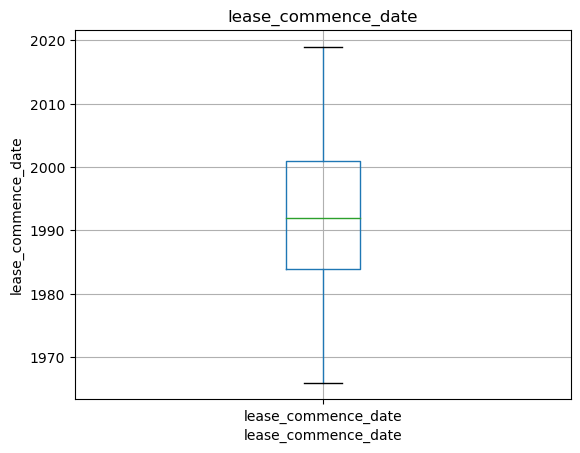

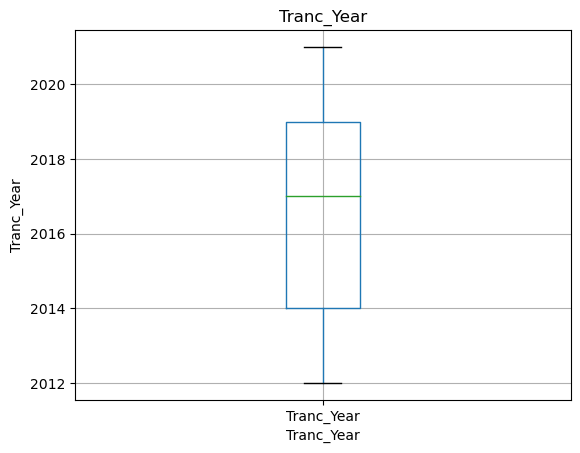

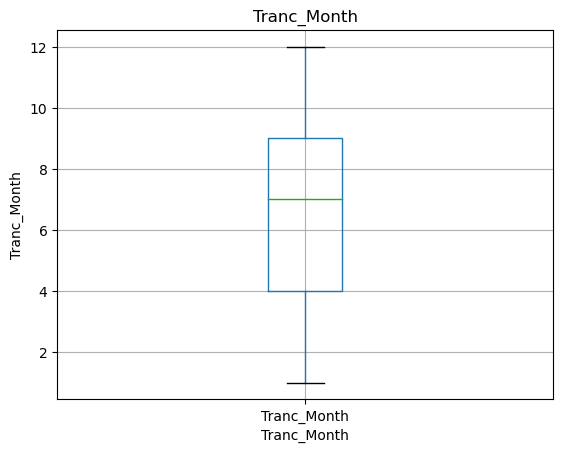

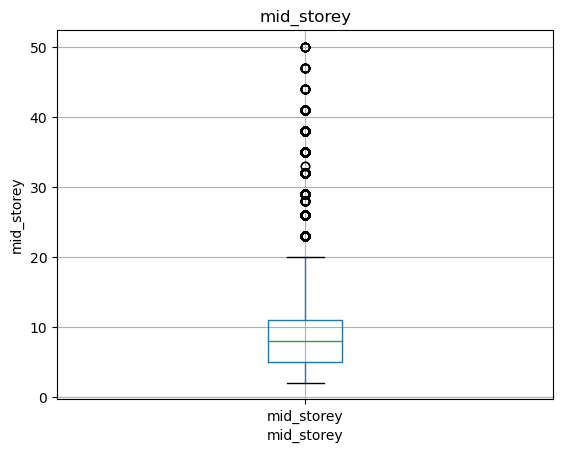

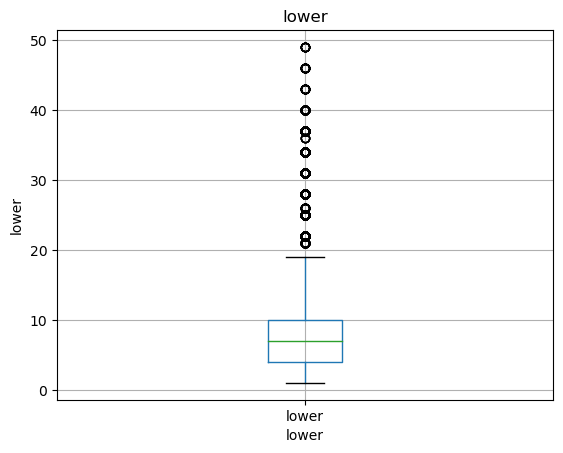

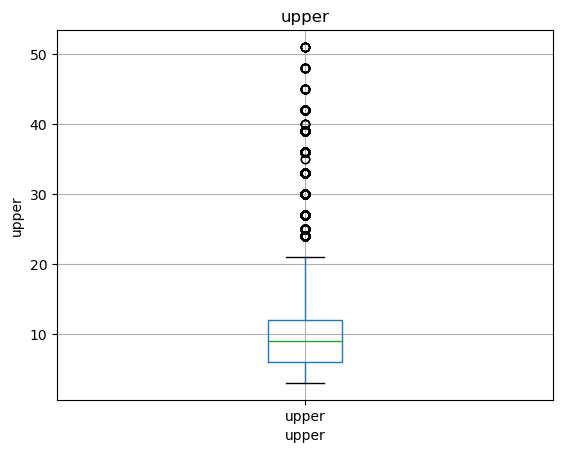

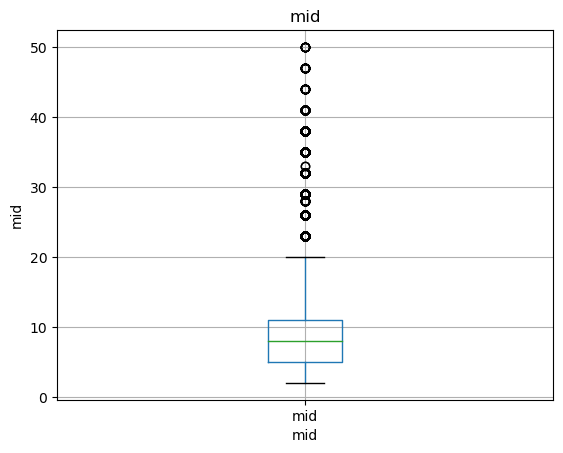

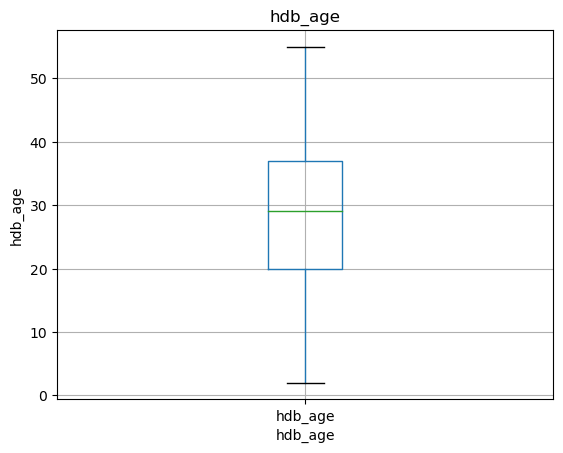

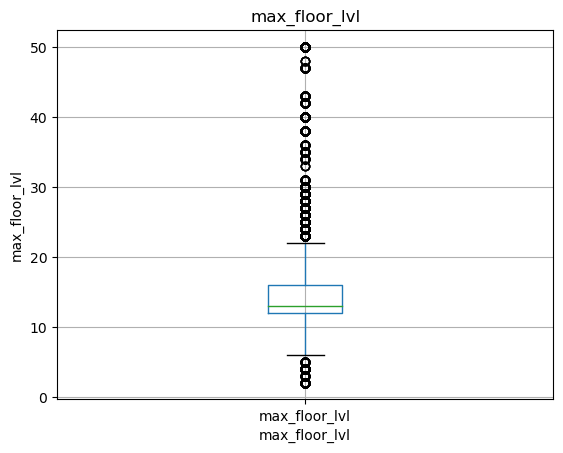

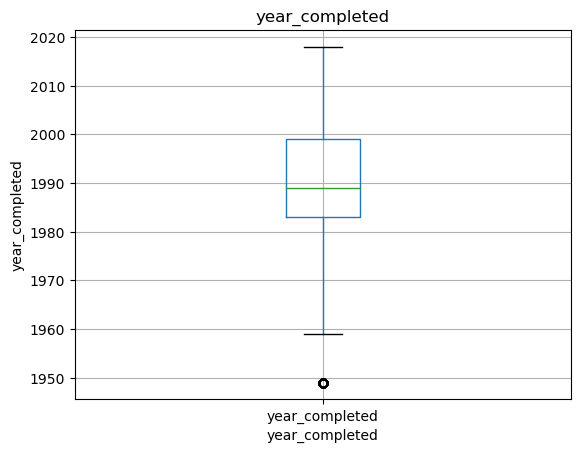

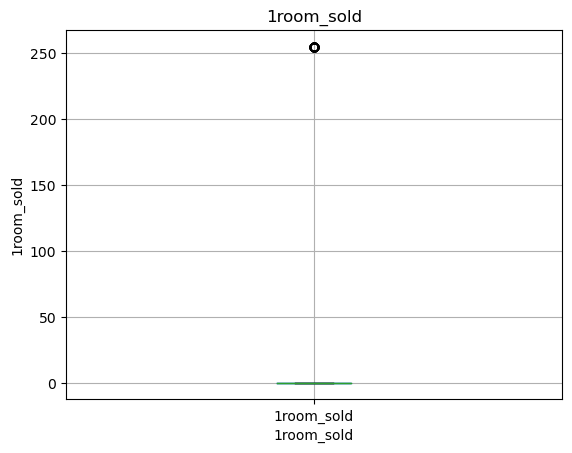

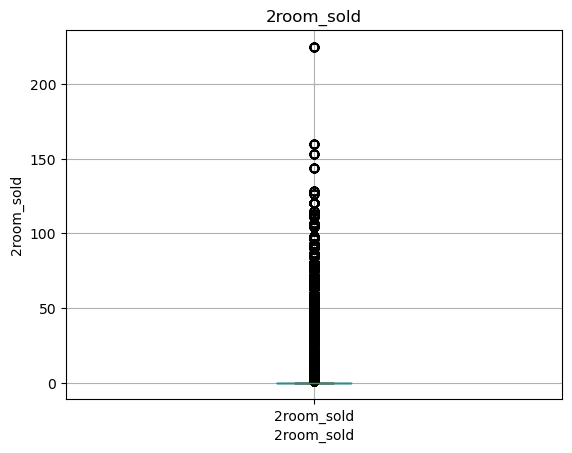

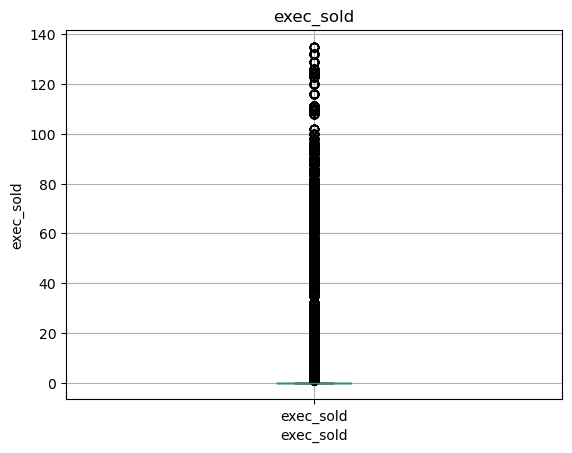

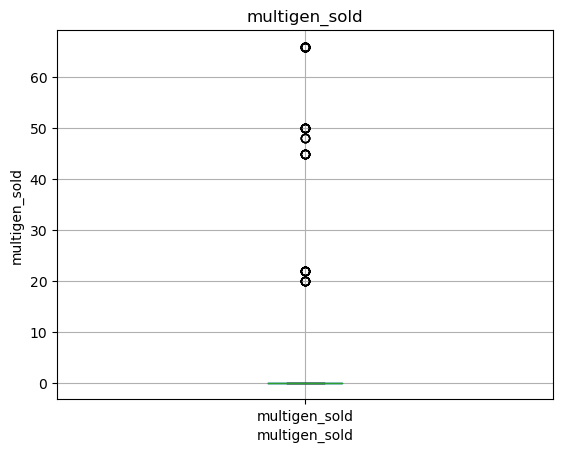

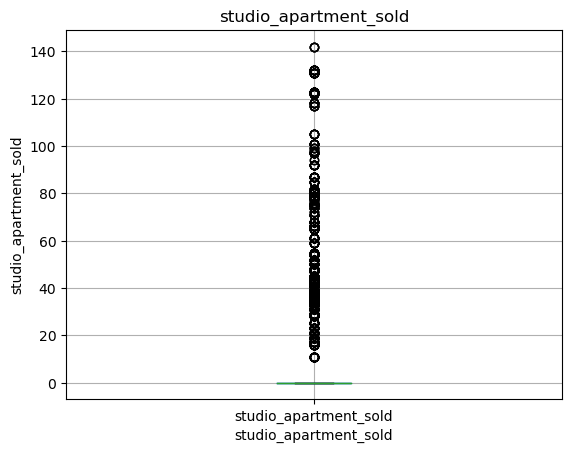

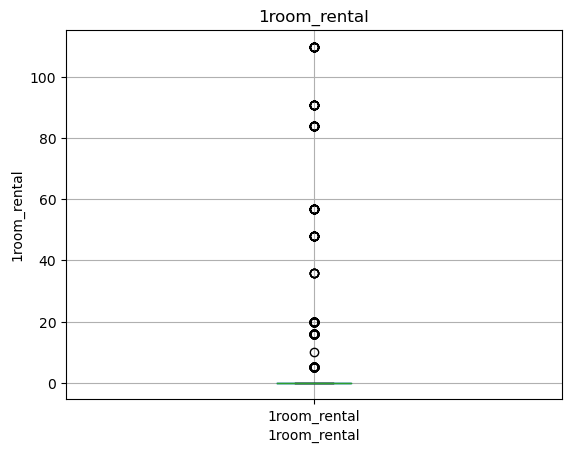

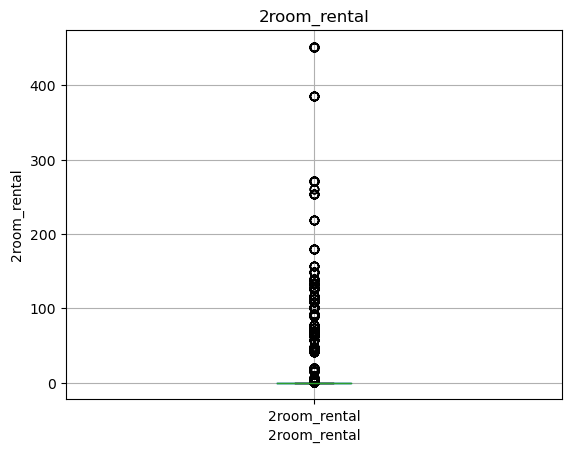

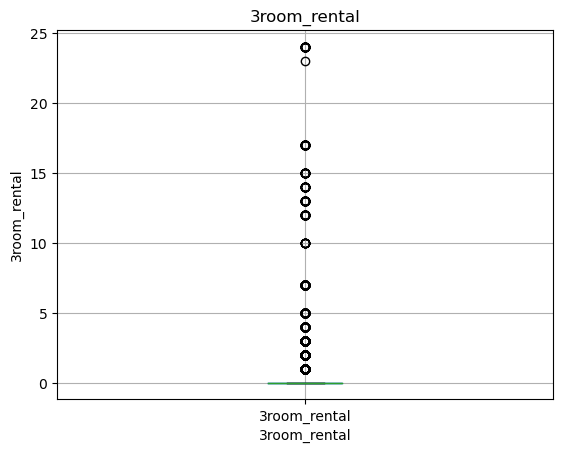

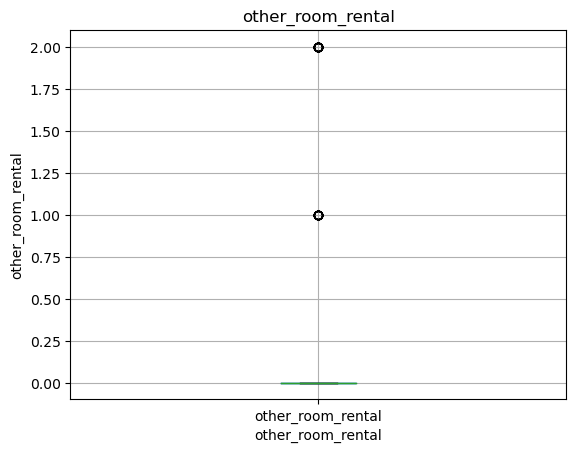

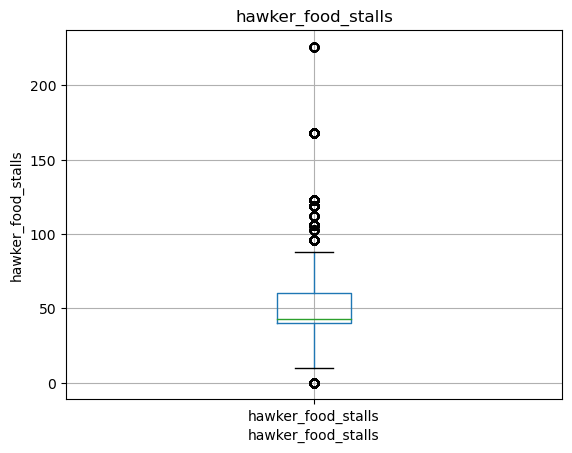

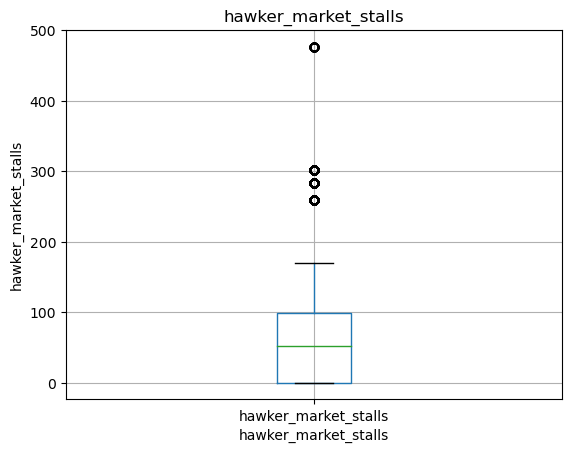

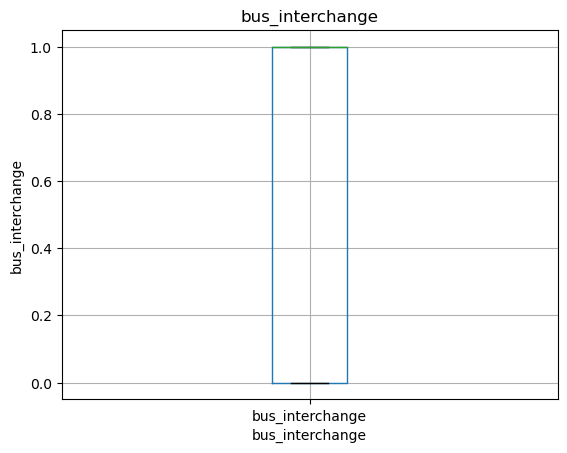

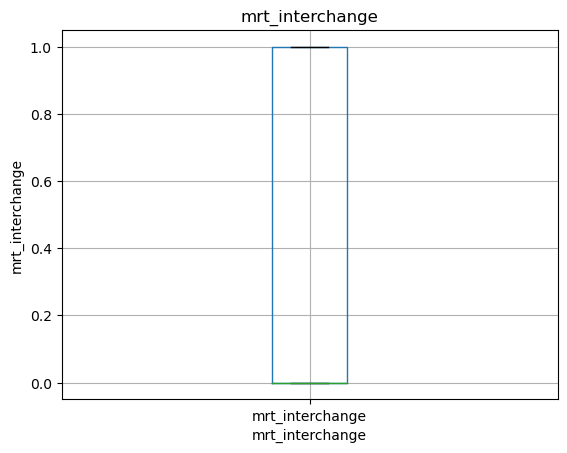

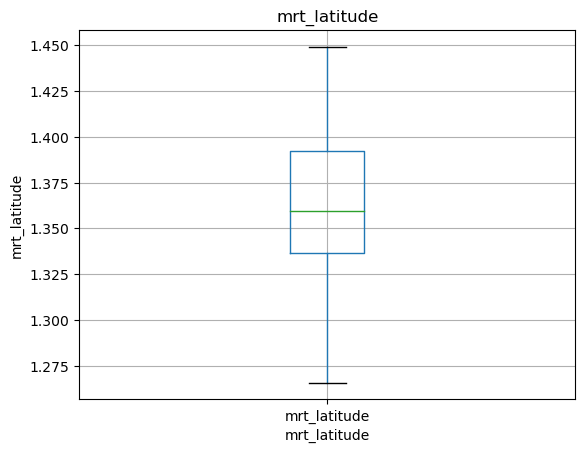

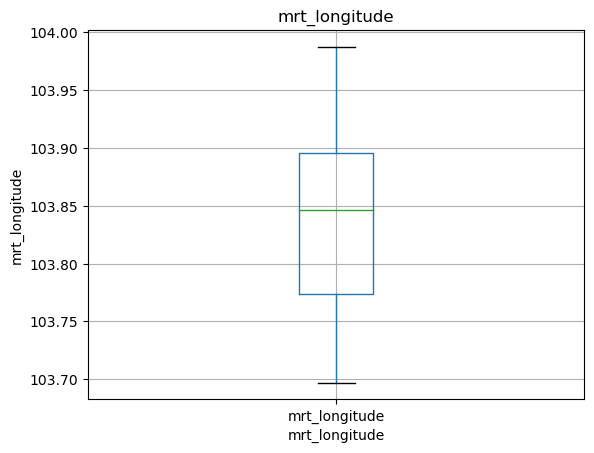

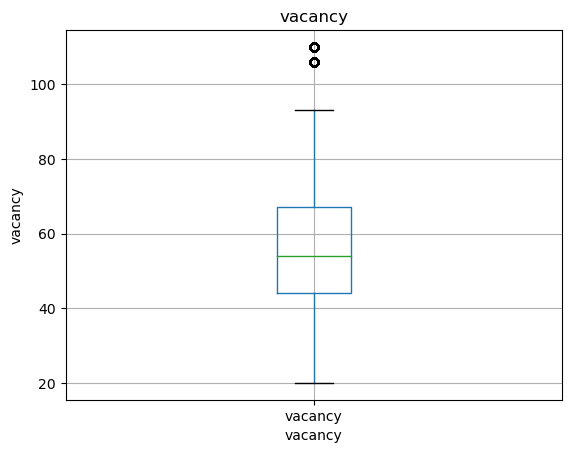

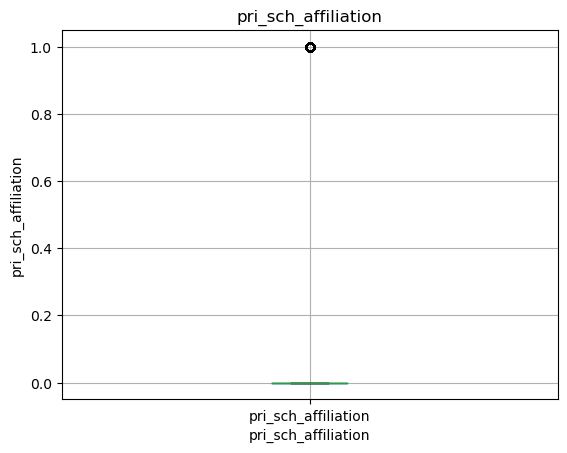

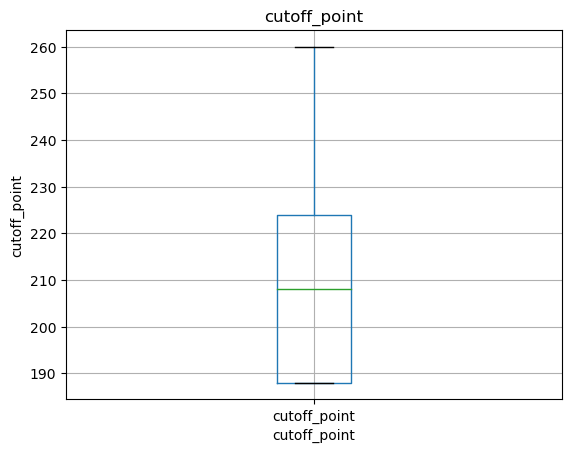

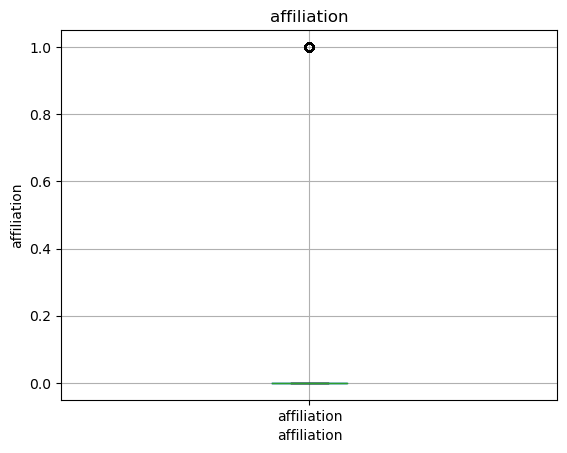

In [33]:
# find out the distribution of each feature and where its outliers are

for feature in discrete_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

**Observations**
1. The first series of charts aims to show if there is any relationship between variables and resale_price. 
    - If there is no clear relationship, then it might be a noise

2. the second chart is to determine if the value has outliers. 
    - Even if there is a relationship, the outliers will make the training data more biased and skewed, which will affect the accuracy of the model
    - however, **outliers can be legitimate anomalies that are vital for capturing information.** If there is a relationship between the feature and resale_price, I will keep it for analysis

3. by combining the insights from the two charts, I will drop the following if it fulfills both conditions:
    - 1room_sold, 2room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental
    - hawker_food_stalls, hawker_market_stalls, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, vacancy
    - pri_sch_affiliation, affiliation

4. there is a relationship between the features mid_storey, lower, upper, mid and resale_price, but it has a lot of outliers
    - will be dropping all but mid. Mid looks like a more reliable feature compared to the rest

In [34]:
# drop columns mentioned above from train dataset
df = df.drop(columns = ['1room_sold', '2room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental','3room_rental','other_room_rental', 'hawker_food_stalls',
                       'hawker_market_stalls', 'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude', 'vacancy', 'pri_sch_affiliation', 'affiliation', 'mid_storey','lower','upper', 'Tranc_Month'])

In [35]:
# drop columns mentioned above from test dataset
df_pred = df_pred.drop(columns = ['1room_sold', '2room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental','3room_rental','other_room_rental', 'hawker_food_stalls',
                       'hawker_market_stalls', 'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude', 'vacancy', 'pri_sch_affiliation', 'affiliation', 'mid_storey','lower','upper', 'Tranc_Month'])

In [36]:
df.head() # check if the columns have been dropped effectively

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  mid       full_flat_type               address  \
0        2016   11       4 ROOM Model A  3B, UPP BOON KENG RD   
1        2012    8      5 ROOM Improved     153, BISHAN ST 13   
2        2013   14  EXECUTIVE Apartment  289B, BT BATOK ST 25   
3        2012    3       4 ROOM Model A     232, BISHAN ST 22   
4        2017    2    4 ROOM Simplified     876, YISHUN ST 81   

   floor_area_sqft  price_per_sqft  hdb_age  max_floor_lvl  year_completed  \
0          968.760      701.928238       15             25            2005   
1         1399.320      475.230826       34              9            1987   
2         1550.016      540.639580       24             16            1996   
3         1108.692      496.080066       29             11            1990   
4          893.412      333.552717       34              4            1987   

  residential commercial market_hawker multistorey_carpark precinct_pavilion  \
0           Y          N             N                   N                 N   
1           Y          N             N                   N                 N   
2           Y          N             N                   N                 N   
3           Y          Y             N                   N                 N   
4           Y          N             N                   N                 N   

   total_dwelling_units  3room_sold  4room_sold  5room_sold  postal  Latitude  \
0                   142           0          96          46  382003  1.314299   
1                   112           0          56          56  570153  1.346086   
2                    90           0           0          30  651289  1.343867   
3                    75           0          68           7  570232  1.358245   
4                    48           0          30          18  760876  1.414745   

    Longitude planning_area  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0  103.872828       Kallang            1094.090418               154.753357   
1  103.855078        Bishan             866.941448               640.151925   
2  103.760535   Bukit Batok            1459.579948              1762.082341   
3  103.845504        Bishan             950.175199               726.215262   
4  103.835532        Yishun             729.771895              1540.151439   

   mrt_nearest_distance     mrt_name  bus_stop_nearest_distance  \
0            330.083069      Kallang                  29.427395   
1            903.659703       Bishan                  58.207761   
2           1334.251197  Bukit Batok                 214.747860   
3            907.453484       Bishan                  43.396521   
4            412.343032       Khatib                 129.422752   

              bus_stop_name  bus_stop_latitude  bus_stop_longitude  \
0                    Blk 3B           1.314433          103.872600   
1              BLK 151A MKT           1.345659          103.855381   
2                  Blk 289E           1.344064          103.758613   
3  Opp Bishan Nth Shop Mall           1.358045 

**Observations:**
* there are still some features that are discrete variables, but was not picked up due to too many unique values
* These discrete variables should be dropped to reduce noise
    * 'id', 'block', 'street_name', 'storey_range', 'max_floor_lvl', '3room_sold', '4room_sold', '5room_sold', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name'

In [37]:
# drop values
df = df.drop(columns = ['id', 'block', 'street_name', 'storey_range', 'max_floor_lvl', '3room_sold', '4room_sold', '5room_sold', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name'])

In [38]:
df_pred = df_pred.drop(columns = ['block', 'street_name', 'storey_range', 'max_floor_lvl', '3room_sold', '4room_sold', '5room_sold', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name'])

In [39]:
df.head()

Tranc_YearMonth             town  flat_type  floor_area_sqm  flat_model  \
0         2016-05  KALLANG/WHAMPOA     4 ROOM            90.0     Model A   
1         2012-07           BISHAN     5 ROOM           130.0    Improved   
2         2013-07      BUKIT BATOK  EXECUTIVE           144.0   Apartment   
3         2012-04           BISHAN     4 ROOM           103.0     Model A   
4         2017-12           YISHUN     4 ROOM            83.0  Simplified   

   lease_commence_date  resale_price  Tranc_Year  mid       full_flat_type  \
0                 2006      680000.0        2016   11       4 ROOM Model A   
1                 1987      665000.0        2012    8      5 ROOM Improved   
2                 1997      838000.0        2013   14  EXECUTIVE Apartment   
3                 1992      550000.0        2012    3       4 ROOM Model A   
4                 1987      298000.0        2017    2    4 ROOM Simplified   

                address  floor_area_sqft  price_per_sqft  hdb_age  \
0  3B, UPP BOON KENG RD          968.760      701.928238       15   
1     153, BISHAN ST 13         1399.320      475.230826       34   
2  289B, BT BATOK ST 25         1550.016      540.639580       24   
3     232, BISHAN ST 22         1108.692      496.080066       29   
4     876, YISHUN ST 81          893.412      333.552717       34   

   year_completed residential commercial market_hawker multistorey_carpark  \
0            2005           Y          N             N                   N   
1            1987           Y          N             N                   N   
2            1996           Y          N             N                   N   
3            1990           Y          Y             N                   N   
4            1987           Y          N             N                   N   

  precinct_pavilion  total_dwelling_units  postal  Latitude   Longitude  \
0                 N                   142  382003  1.314299  103.872828   
1                 N                   112  570153  1.346086  103.855078   
2                 N                    90  651289  1.343867  103.760535   
3                 N                    75  570232  1.358245  103.845504   
4                 N                    48  760876  1.414745  103.835532   

  planning_area  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0       Kallang            1094.090418               154.753357   
1        Bishan             866.941448               640.151925   
2   Bukit Batok            1459.579948              1762.082341   
3        Bishan             950.175199               726.215262   
4        Yishun             729.771895              1540.151439   

   mrt_nearest_distance     mrt_name  bus_stop_nearest_distance  \
0            330.083069      Kallang                  29.427395   
1            903.659703       Bishan                  58.207761   
2           1334.251197  Bukit Batok                 214.747860   
3            907.453484       Bishan                  43.396521   
4            412.343032       Khatib                 129.422752   

   bus_stop_latitude  bus_stop_longitude  pri_sch_nearest_distance  \
0           1.314433          103.872600               1138.633422   
1           1.345659          103.855381                415.607357   
2           1.344064          103.758613                498.849039   
3           1.358045          103.845169                389.515528   
4           1.415424          103.836477                401.200584   

   pri_sch_latitude  pri_sch_longitude  sec_sch_nearest_dist  cutoff_point  \
0          1.317659         103.882504           1138.633422           224   
1          1.349783         103.854529            447.894399           232   
2          1.345245         103.756265            180.074558           188   
3          1.354789         103.844934            389.515528           253   
4          1.416280         103.838798            312.025435           208   

   sec_sch_latitude  sec_sch_longitude 

### Temporal Variables

**Observations:**
* From the dataset we have 5 temporal variables: Tranc_YearMonth, lease_commence_date, Tranc_Year, Tranc_Month, year_completed.
* This information is useful when we can extract information such as the difference in years between the year of the house was built and the year that the house was sold
* We can also study if there are any relationship between the remaining lease years, and the year that the house was built

In [40]:
# explore the temporal variables
temporal_features = ['Tranc_YearMonth', 'lease_commence_date', 'Tranc_Year', 'year_completed']

for feature in temporal_features:
    print(feature, df[feature].unique())

Tranc_YearMonth ['2016-05' '2012-07' '2013-07' '2012-04' '2017-12' '2013-01' '2018-05'
 '2012-03' '2020-01' '2014-06' '2013-06' '2018-03' '2017-07' '2015-08'
 '2019-10' '2018-01' '2020-11' '2015-12' '2017-08' '2015-07' '2019-04'
 '2019-08' '2020-06' '2020-07' '2017-09' '2016-03' '2012-11' '2012-12'
 '2018-11' '2013-04' '2020-12' '2019-03' '2017-04' '2016-12' '2021-04'
 '2012-10' '2014-07' '2018-04' '2017-01' '2015-04' '2012-06' '2013-08'
 '2019-07' '2017-02' '2020-08' '2017-10' '2020-10' '2015-01' '2020-02'
 '2019-01' '2019-09' '2016-06' '2016-08' '2018-12' '2018-07' '2015-03'
 '2012-05' '2014-04' '2014-09' '2014-12' '2015-09' '2017-11' '2020-03'
 '2015-06' '2012-09' '2014-11' '2014-05' '2021-01' '2012-08' '2016-04'
 '2013-05' '2016-02' '2016-01' '2018-02' '2014-10' '2021-02' '2017-06'
 '2014-03' '2018-06' '2019-02' '2020-04' '2021-03' '2016-09' '2019-11'
 '2016-11' '2015-02' '2018-08' '2013-10' '2019-06' '2017-03' '2020-09'
 '2013-11' '2013-03' '2016-07' '2014-08' '2019-12' '2018-10' 

In [41]:
# drop Tranc_YearMonth as duplicate for Tranc_Year and Tranc_Month
df = df.drop(columns = ['Tranc_YearMonth'])

In [42]:
df_pred = df_pred.drop(columns = ['Tranc_YearMonth'])

Text(0.5, 1.0, 'Resale Price vs Year Sold')

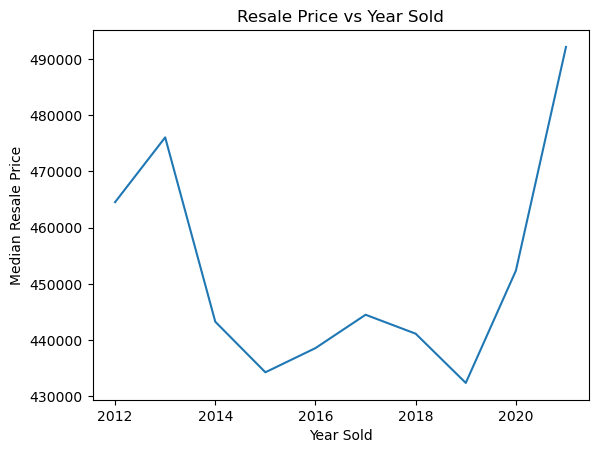

In [43]:
# understand the r/s between year and transaction price
df.groupby('Tranc_Year')['resale_price'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Resale Price')
plt.title('Resale Price vs Year Sold')

**Observation**: Over the years, the mean resale_price has fell, but increases sharply during 2019. It will be worth digging deeper on this in the exploratory data visualisation section below

In [44]:
# add a column to get remaining lease years
df['remaining_lease_years'] = 99 - (2022 - df['lease_commence_date']) 

In [45]:
df_pred['remaining_lease_years'] = 99 - (2022 - df_pred['lease_commence_date']) 

Text(0.5, 1.0, 'Remaining Lease Years and Resale Price')

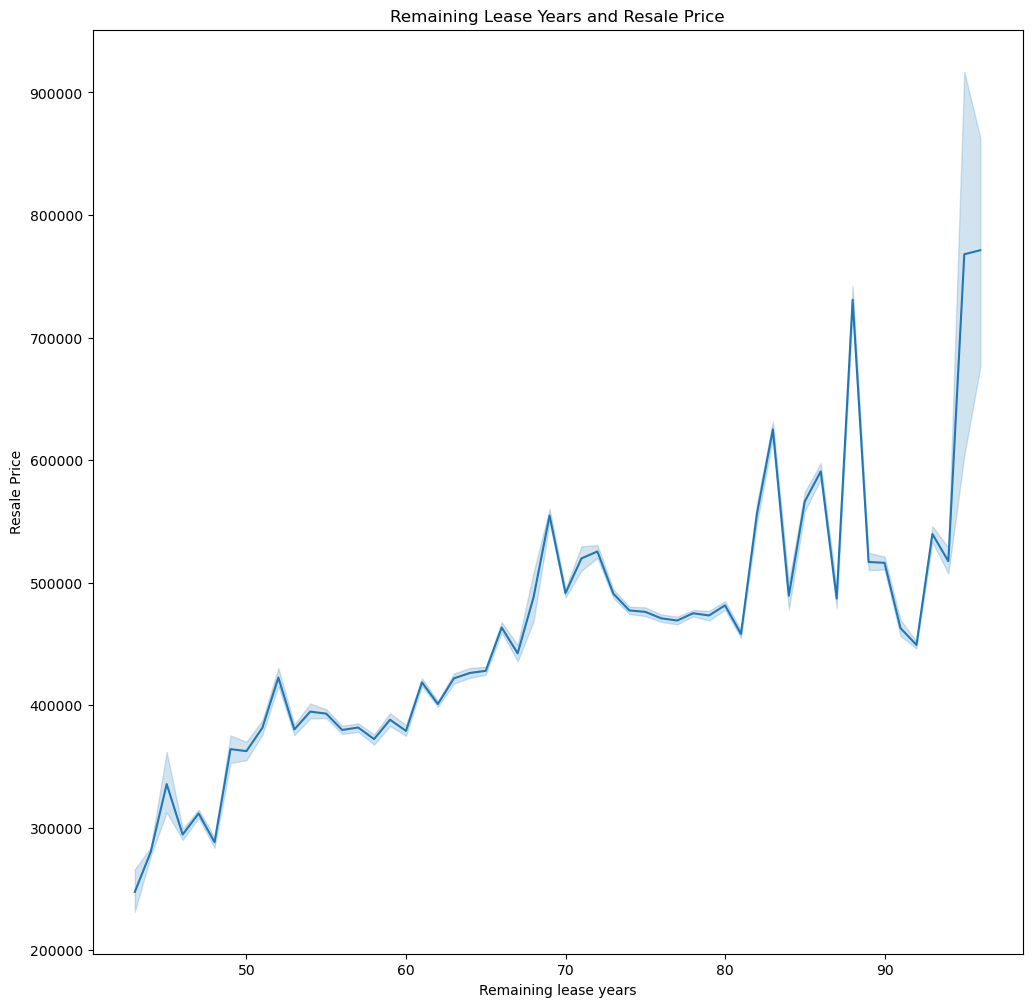

In [46]:
# plot a relationship between remaining lease years and resale price

plt.figure(figsize = (12,12))
sns.lineplot(x = "remaining_lease_years", y = "resale_price", data = df)
plt.xlabel('Remaining lease years')
plt.ylabel('Resale Price')
plt.title('Remaining Lease Years and Resale Price')

**Observation**:

1. I will drop Tranc_Month as there is not clear relationship
2. for the rest of the features, I will study its distributions

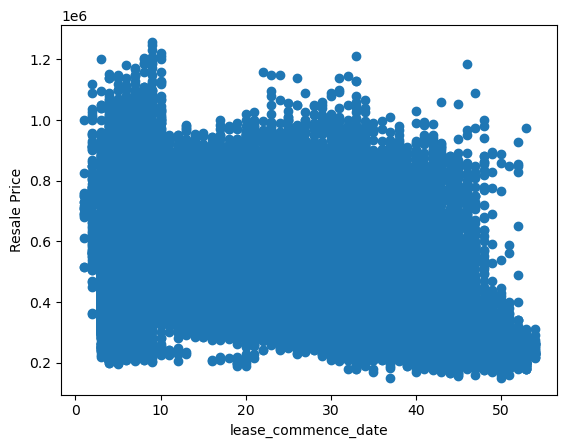

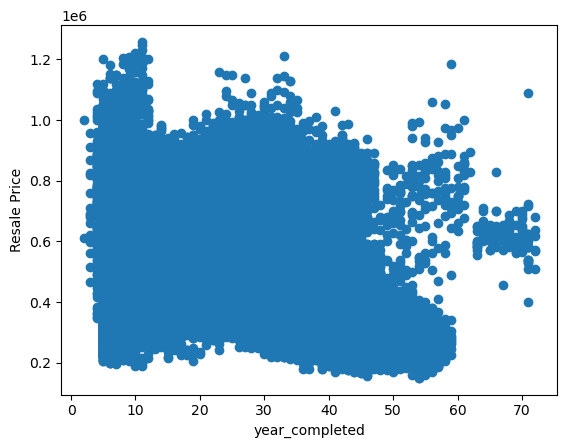

In [47]:
# compared with all features with resale price
year_features=['lease_commence_date', 'Tranc_Year', 'year_completed']

# get the difference between the year varialble, and the year the house was sold
for feature in year_features:
    if feature != 'Tranc_Year':
        data = df.copy()
        data[feature] = data['Tranc_Year']-data[feature]
        
        plt.scatter(data[feature], data['resale_price'])
        plt.xlabel(feature)
        plt.ylabel('Resale Price')
        plt.show()

### Continuous Variables

In [48]:
continuous_feature = [feature for feature in df if len(df[feature].unique())>120]
print('Continuous Variables Count:{}'.format(len(continuous_feature)))

Continuous Variables Count:21


In [49]:
# find out the 21 continuous variables, and whether they should be categorical instead
continuous_feature

['floor_area_sqm',
 'resale_price',
 'address',
 'floor_area_sqft',
 'price_per_sqft',
 'total_dwelling_units',
 'postal',
 'Latitude',
 'Longitude',
 'Mall_Nearest_Distance',
 'Hawker_Nearest_Distance',
 'mrt_nearest_distance',
 'bus_stop_nearest_distance',
 'bus_stop_latitude',
 'bus_stop_longitude',
 'pri_sch_nearest_distance',
 'pri_sch_latitude',
 'pri_sch_longitude',
 'sec_sch_nearest_dist',
 'sec_sch_latitude',
 'sec_sch_longitude']

**Observation**: 
1. Postal should not be a continuous variables. Instead, it should be a categorical feature.
    * we will perform transformation for pre-processing later
2. floor_area_sqm and floor_area_sqft are the same
    * I will drop floor_area_sqft as it is less likely to be used (link: 
3. Same suite of variables can give the same information, for example:
    * bus_stop_nearest_distance, bus_stop_latitude, bus_stop_longitude 
    * pri_sch_nearest_distance, pri_sch_latitude, pri_sch_longitude
    * sec_sch_nearest_distance, sec_sch_latitude, sec_sch_longitude
        * I will keep the first variable of these groups, because it can tell the nearest bus stop/primary school/secondary school from the resale unit
4. address should be a categorical variable. I will drop this
    * also, latitude and longitude will not be able to give a meaningful answer. I will also drop this

**Next steps**:
1. Find the relationship between each continuous features (using mean), and resale_price
2. Find out if they have outliers, using box plots

floor_area_sqm


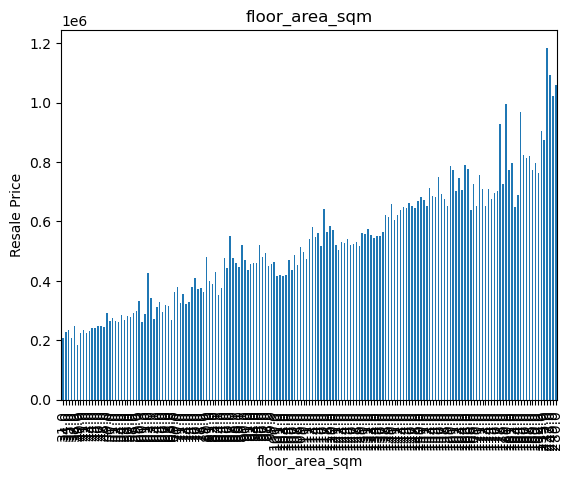

resale_price


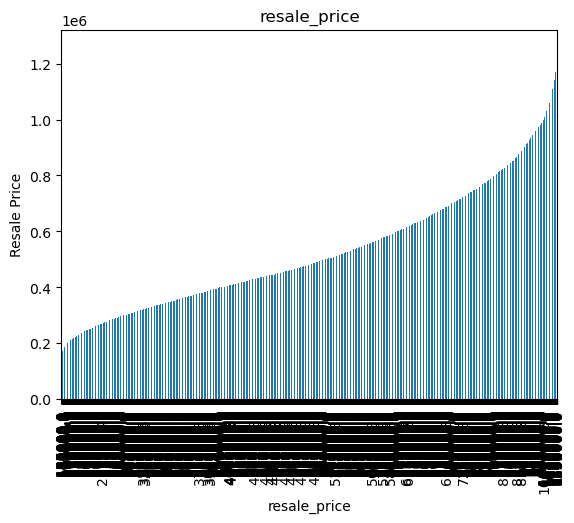

address


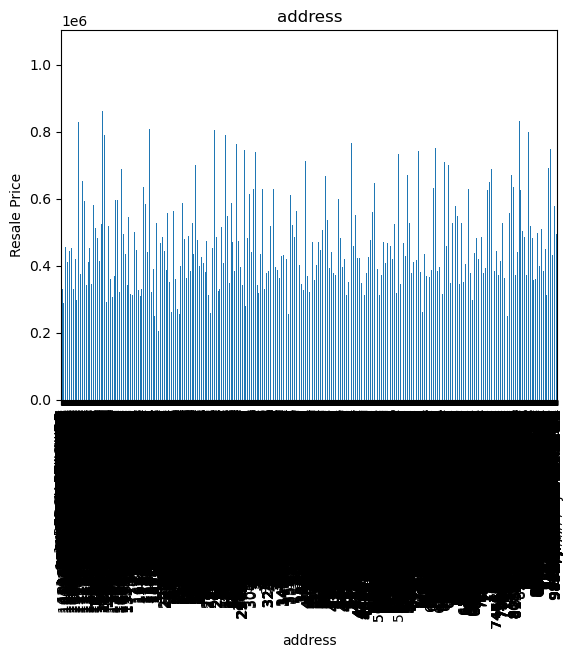

floor_area_sqft


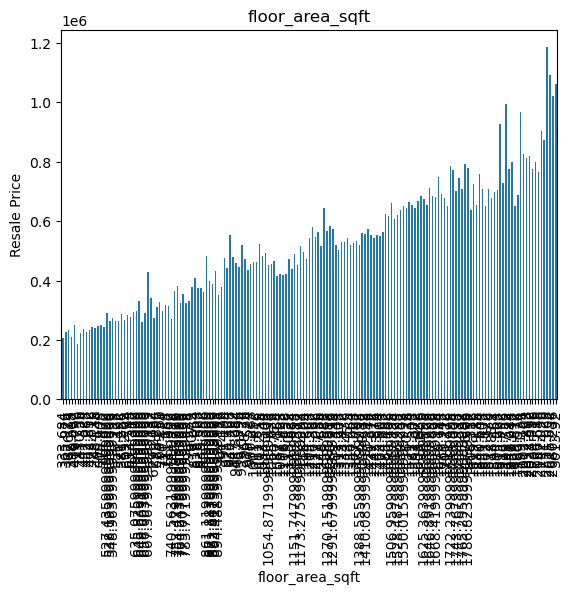

price_per_sqft


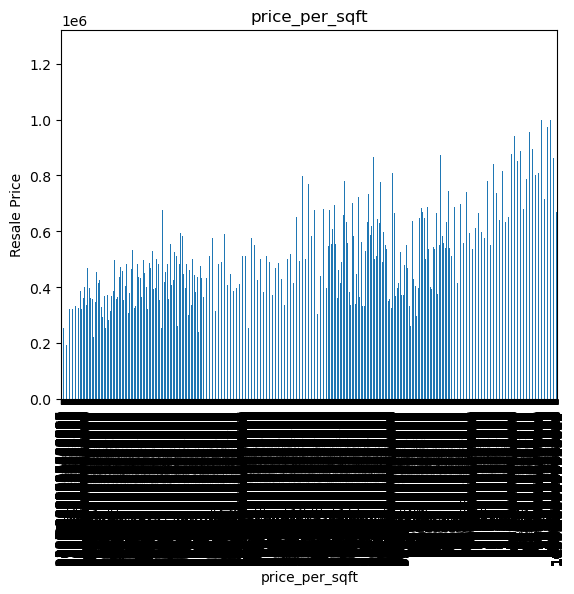

total_dwelling_units


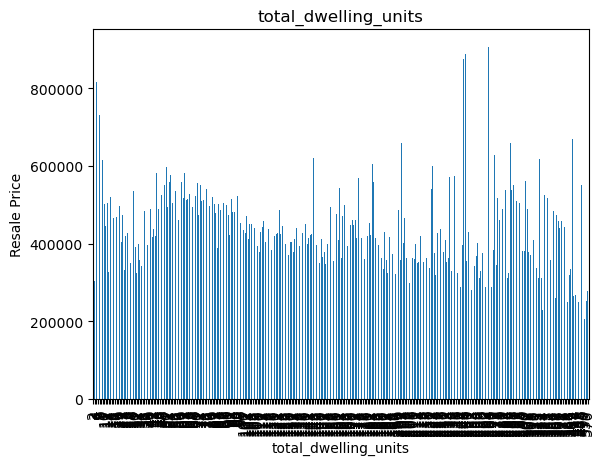

postal


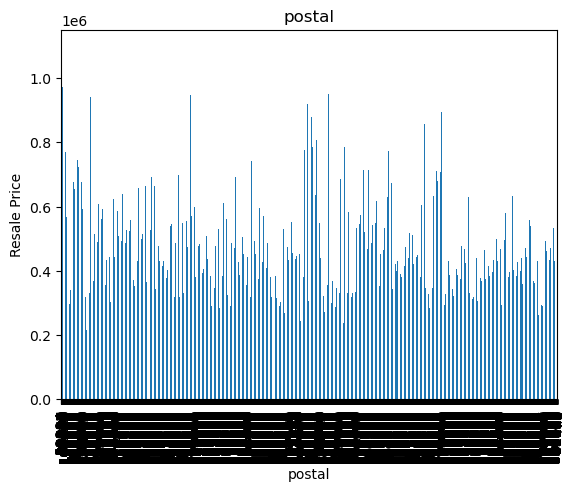

Latitude


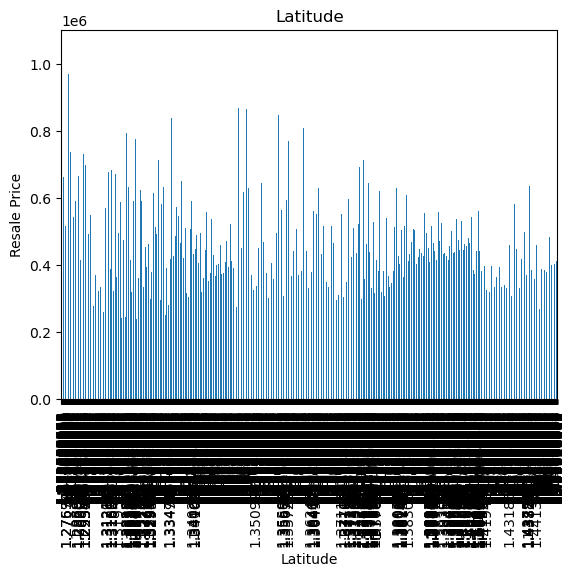

Longitude


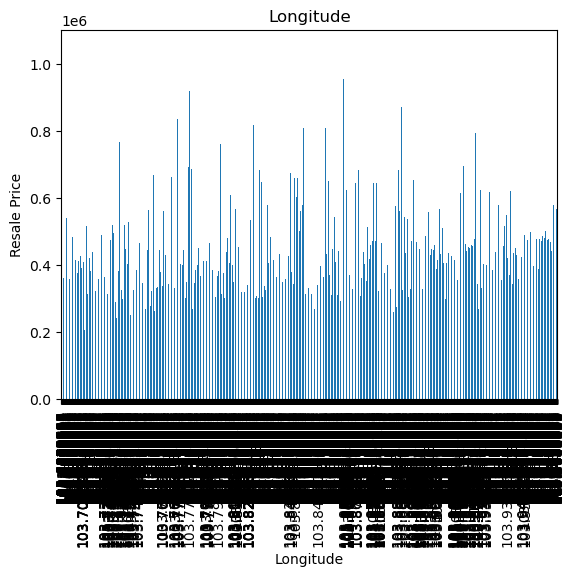

Mall_Nearest_Distance


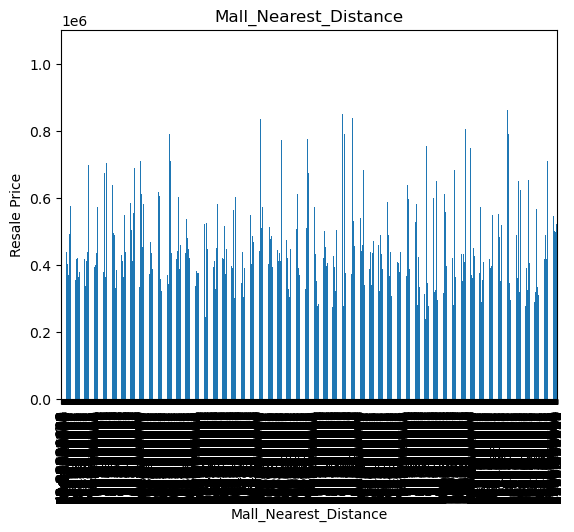

Hawker_Nearest_Distance


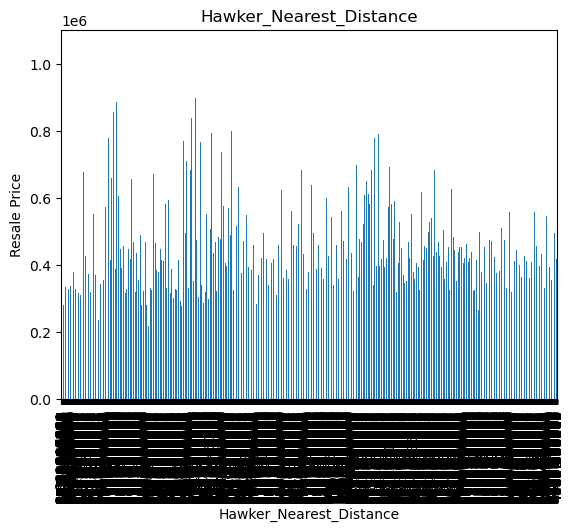

mrt_nearest_distance


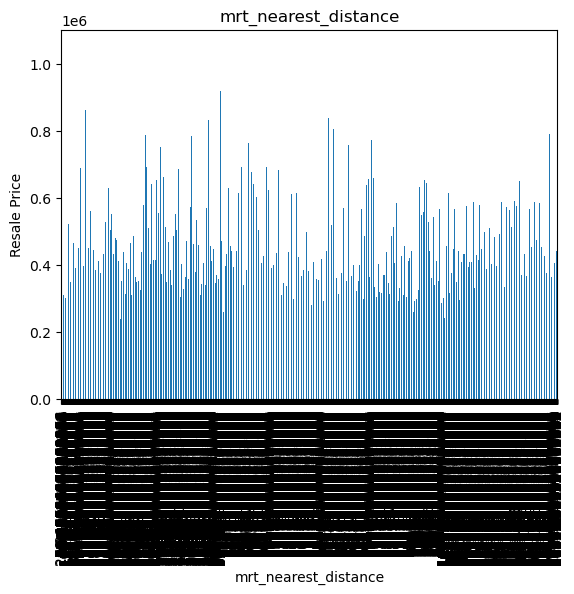

bus_stop_nearest_distance


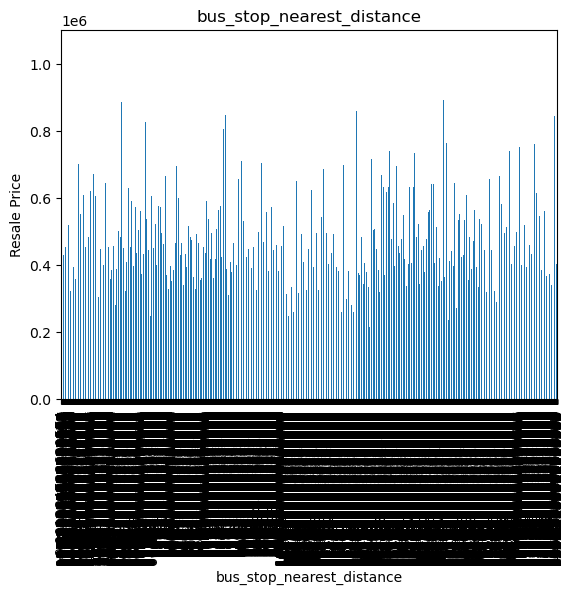

bus_stop_latitude


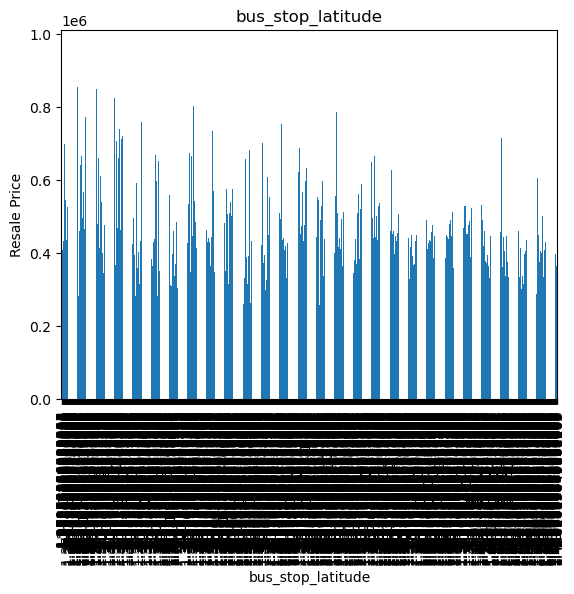

bus_stop_longitude


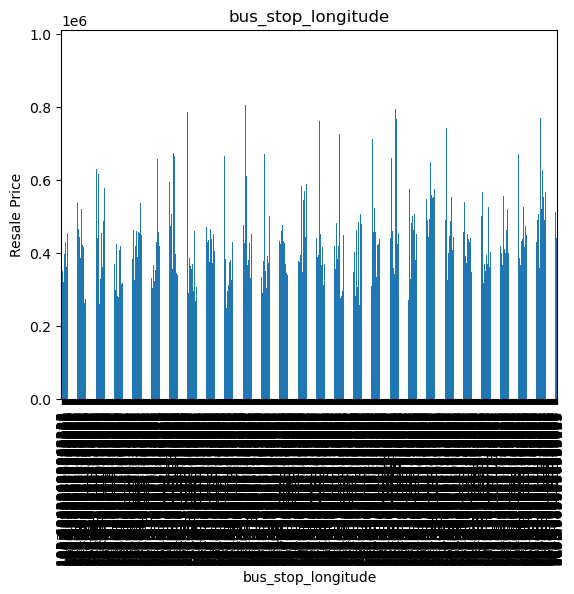

pri_sch_nearest_distance


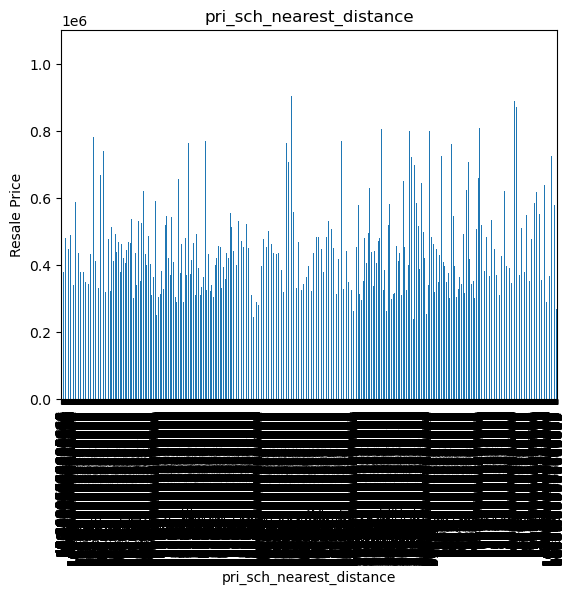

pri_sch_latitude


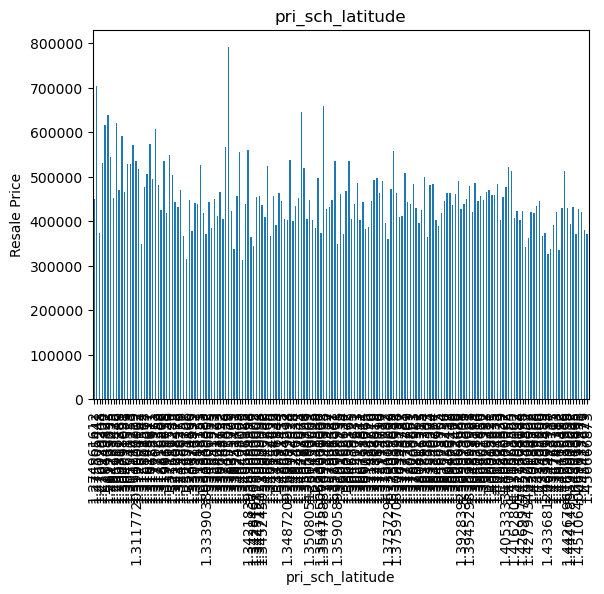

pri_sch_longitude


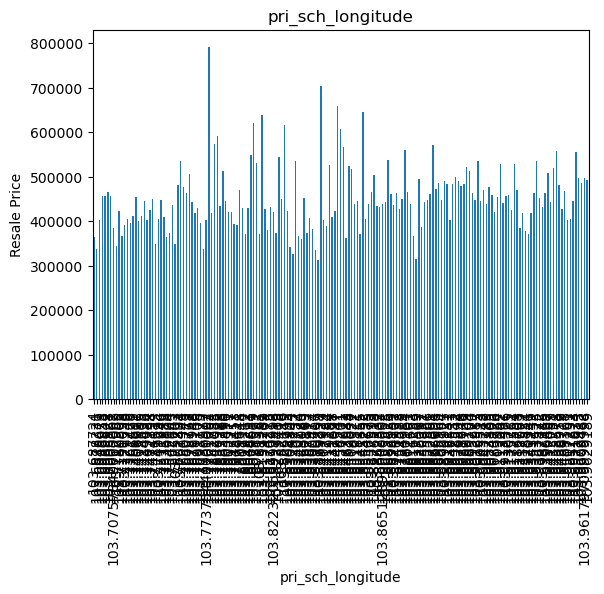

sec_sch_nearest_dist


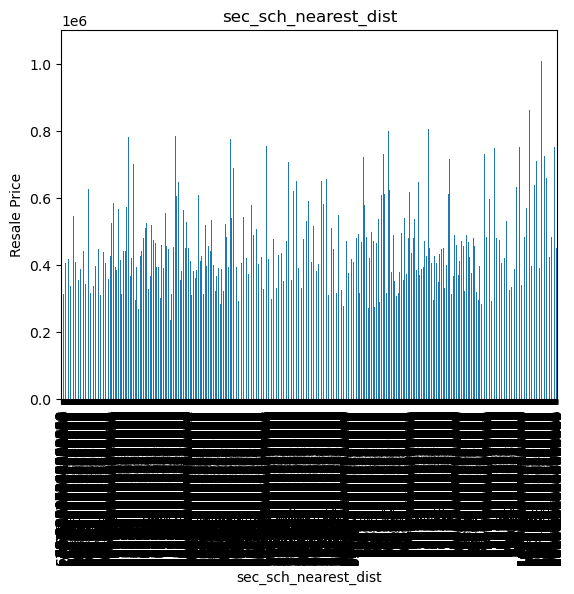

sec_sch_latitude


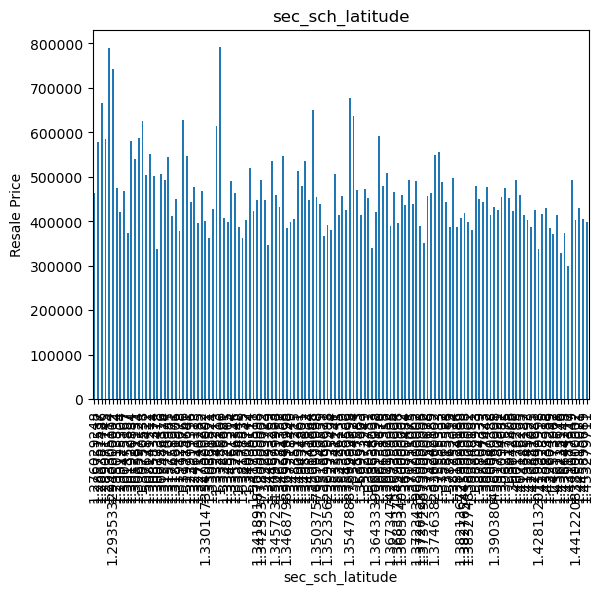

sec_sch_longitude


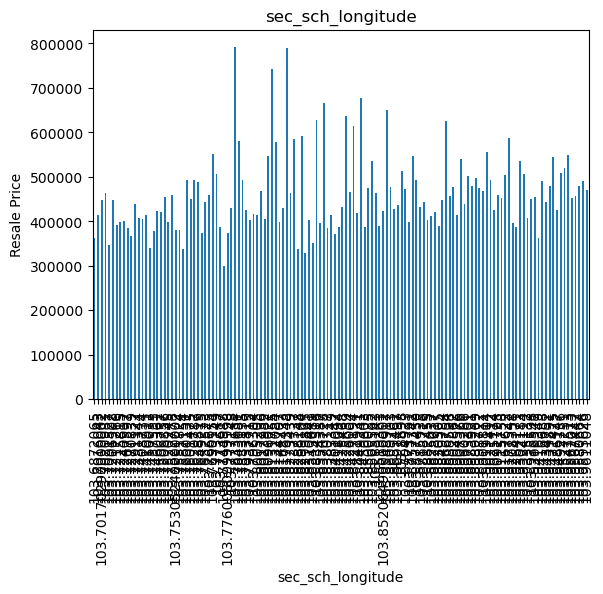

In [50]:
### find out the relationship between continuous features and resale_price, using the mean

for feature in continuous_feature:
    df.groupby(feature)['resale_price'].mean().plot.bar()
    print (feature)
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(feature)
    plt.show()

In [51]:
# drop first
df = df.drop(columns = ['price_per_sqft', 'floor_area_sqft', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude',
                        'sec_sch_latitude', 'sec_sch_longitude', 'address', 'Latitude', 'Longitude', 'price_per_sqft'])

In [52]:
df_pred = df_pred.drop(columns = ['price_per_sqft', 'floor_area_sqft', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude',
                        'sec_sch_latitude', 'sec_sch_longitude', 'address', 'Latitude', 'Longitude', 'price_per_sqft'])

In [53]:
# regenerate continuous_feature list

continuous_feature = [feature for feature in df if len(df[feature].unique())>120]
print('Continuous Variables Count:{}'.format(len(continuous_feature)))

Continuous Variables Count:10


In [54]:
continuous_feature

['floor_area_sqm',
 'resale_price',
 'total_dwelling_units',
 'postal',
 'Mall_Nearest_Distance',
 'Hawker_Nearest_Distance',
 'mrt_nearest_distance',
 'bus_stop_nearest_distance',
 'pri_sch_nearest_distance',
 'sec_sch_nearest_dist']

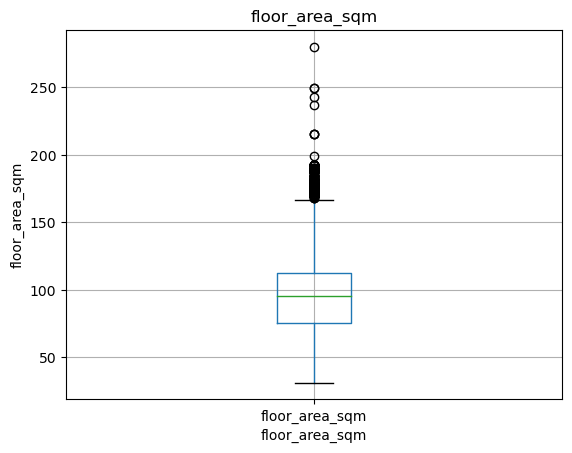

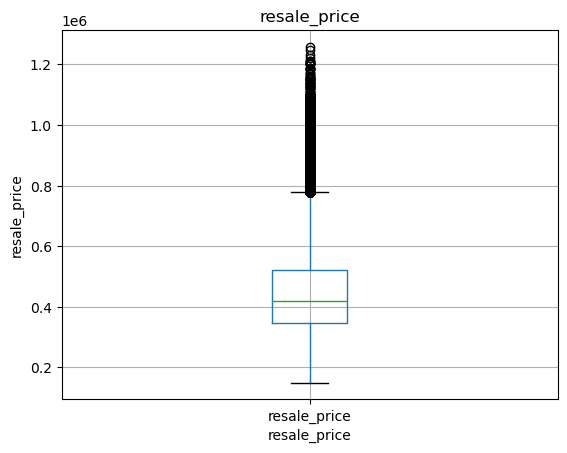

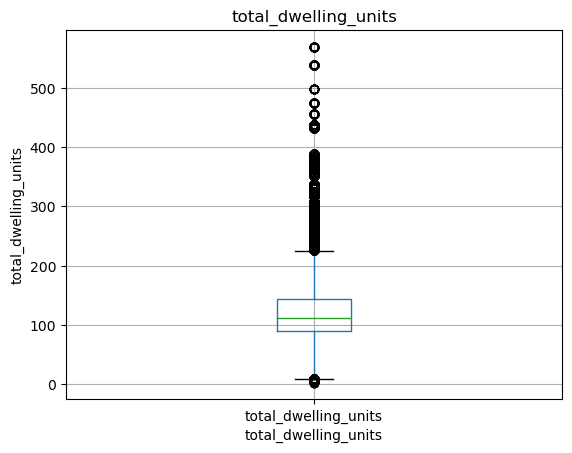

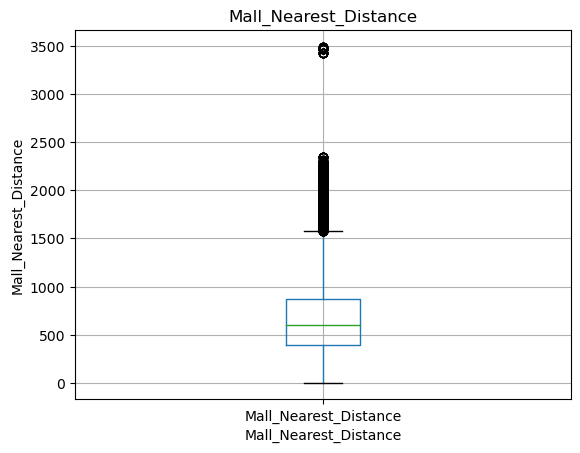

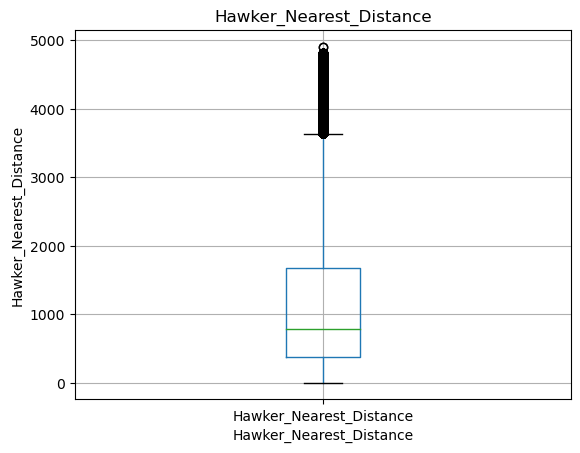

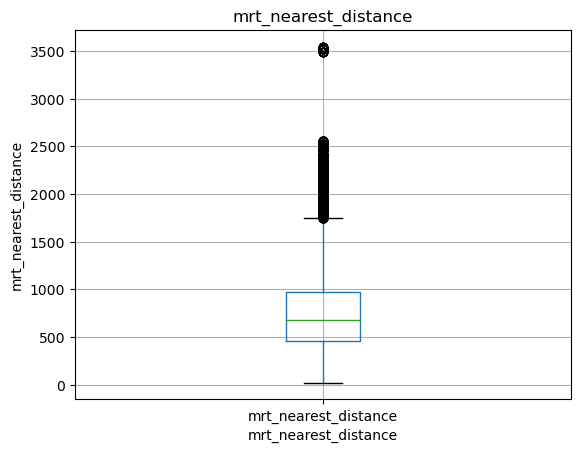

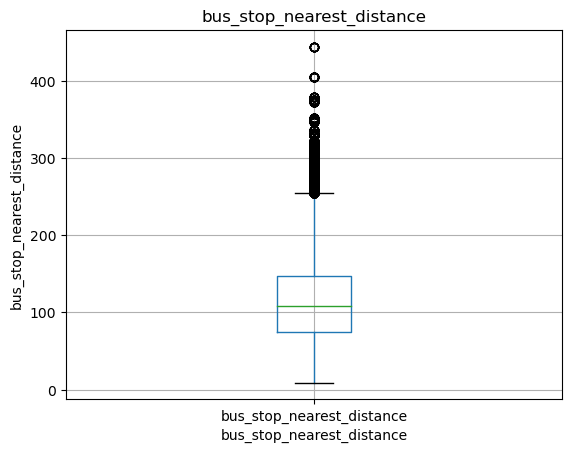

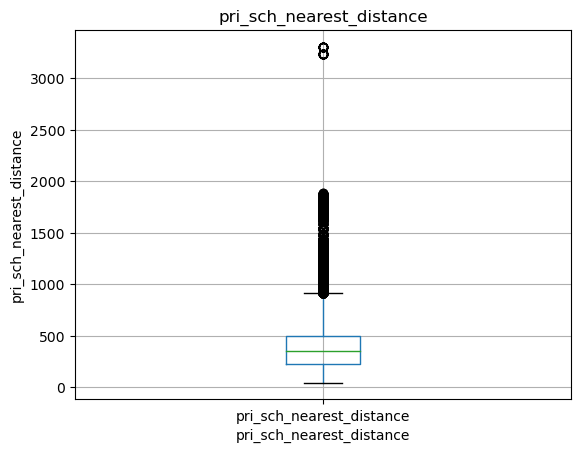

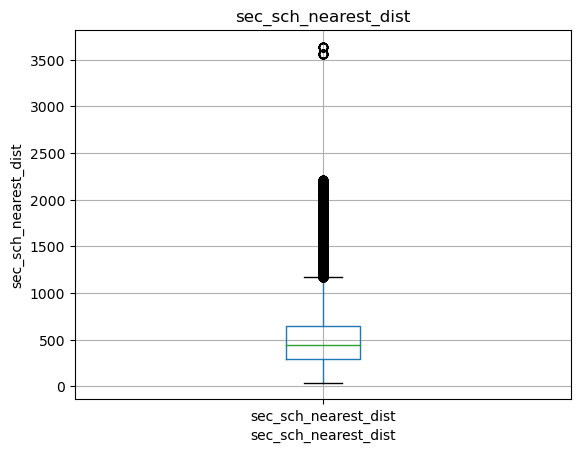

In [55]:
# find out if there are any outliers of the variables
for feature in continuous_feature:
    if df[feature].dtype != 'O': # skip postal feature, which is an object
        df.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Observations**
1. All the remaining continuous variables are skewed to the left
2. It looks like total_dwelling_units may not have a relationship with resale_price. Since it also has a lot of outliers, I will drop that
3. Although the variables such as Mall_Nearest_Distance, Hawker_Nearest_Distance, mrt_nearest_distance, bus_stop_nearest_distance, pri_sch_nearest_distance and sec_sch_nearest_dist looks random against resale_price, I will keep these variables and perform feature engineering to group them by district / town.

### Categorical Variables

1. Categorical variables are those that we would need to perform one-hot encoding 
2. I will study the number of unique values of each feature to determine how many one-hot encoding should I be doing later

In [56]:
categorical_features=[feature for feature in df.columns if data[feature].dtype=='O']

In [57]:
categorical_features

['town',
 'flat_type',
 'flat_model',
 'full_flat_type',
 'residential',
 'commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'postal',
 'planning_area',
 'mrt_name']

In [58]:
df[categorical_features].head()

town  flat_type  flat_model       full_flat_type residential  \
0  KALLANG/WHAMPOA     4 ROOM     Model A       4 ROOM Model A           Y   
1           BISHAN     5 ROOM    Improved      5 ROOM Improved           Y   
2      BUKIT BATOK  EXECUTIVE   Apartment  EXECUTIVE Apartment           Y   
3           BISHAN     4 ROOM     Model A       4 ROOM Model A           Y   
4           YISHUN     4 ROOM  Simplified    4 ROOM Simplified           Y   

  commercial market_hawker multistorey_carpark precinct_pavilion  postal  \
0          N             N                   N                 N  382003   
1          N             N                   N                 N  570153   
2          N             N                   N                 N  651289   
3          Y             N                   N                 N  570232   
4          N             N                   N                 N  760876   

  planning_area     mrt_name  
0       Kallang      Kallang  
1        Bishan       Bishan  
2   Bukit Batok  Bukit Batok  
3        Bishan       Bishan  
4        Yishun       Khatib

In [59]:
for feature in categorical_features:
    print('The feature is {} and no of categories are {}'.format(feature,len(df[feature].unique())))

The feature is town and no of categories are 26
The feature is flat_type and no of categories are 7
The feature is flat_model and no of categories are 20
The feature is full_flat_type and no of categories are 43
The feature is residential and no of categories are 1
The feature is commercial and no of categories are 2
The feature is market_hawker and no of categories are 2
The feature is multistorey_carpark and no of categories are 2
The feature is precinct_pavilion and no of categories are 2
The feature is postal and no of categories are 17483
The feature is planning_area and no of categories are 32
The feature is mrt_name and no of categories are 94


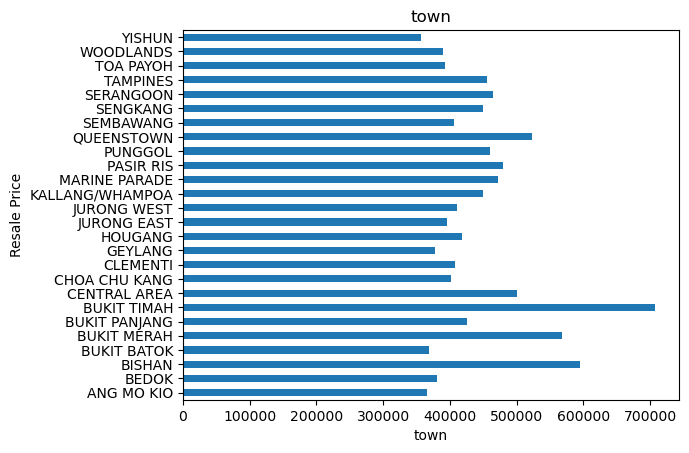

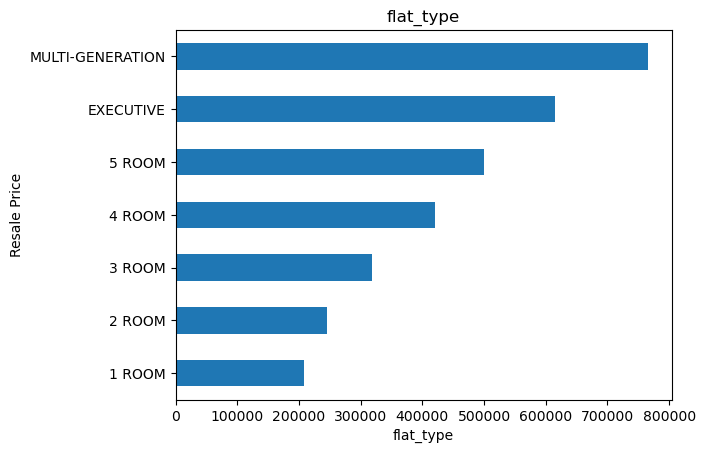

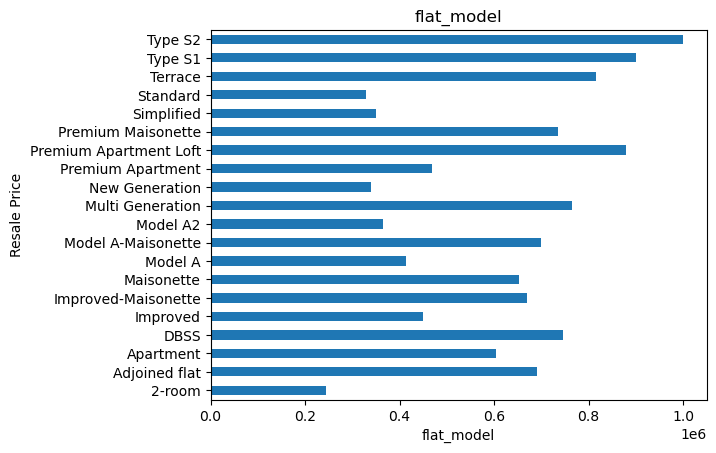

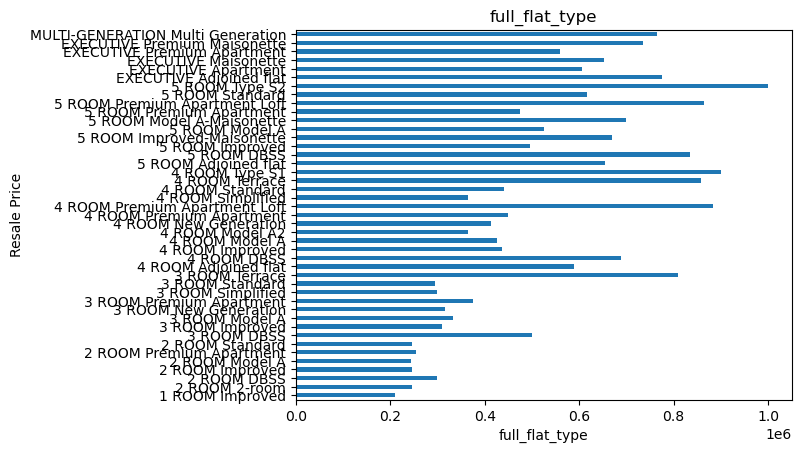

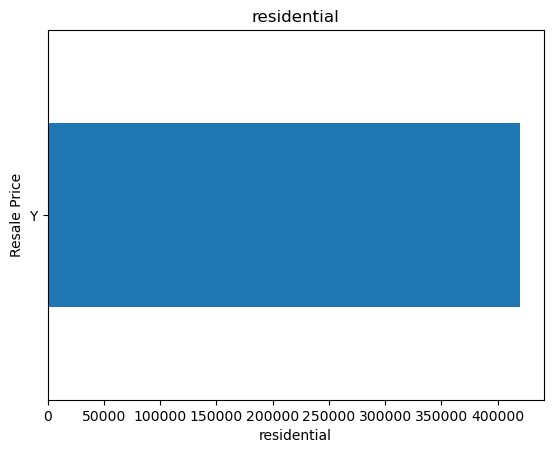

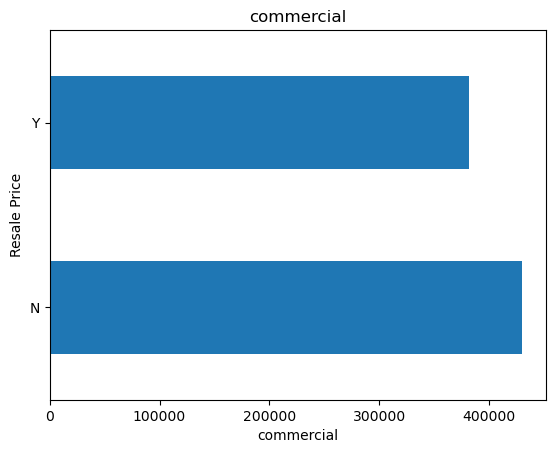

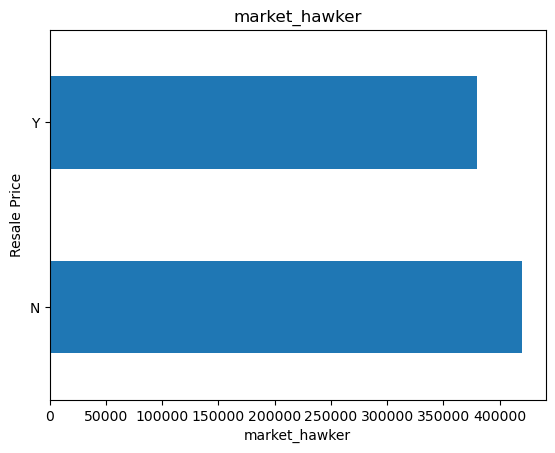

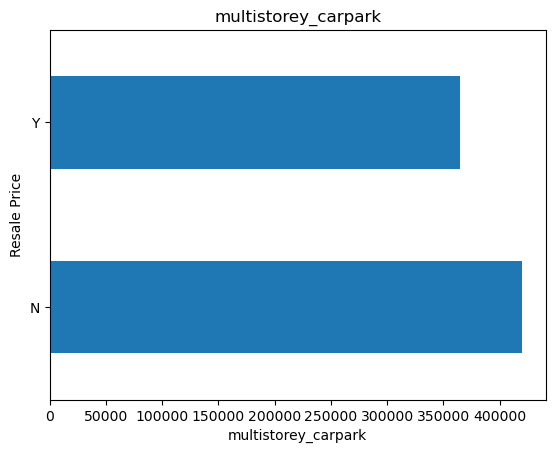

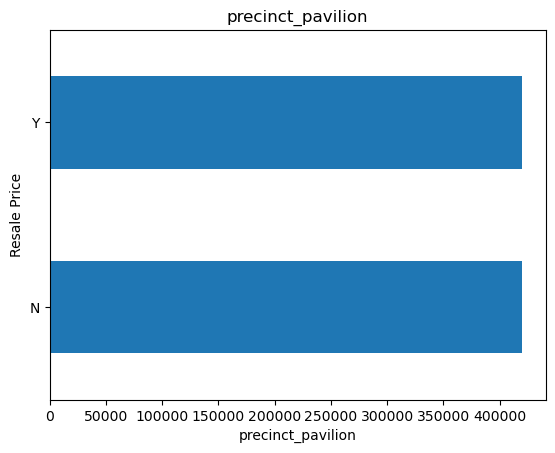

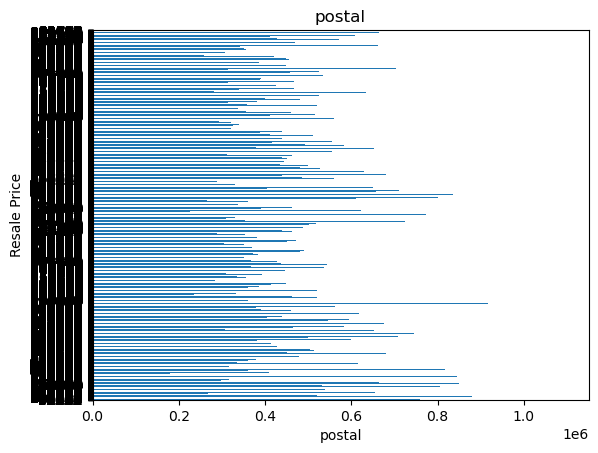

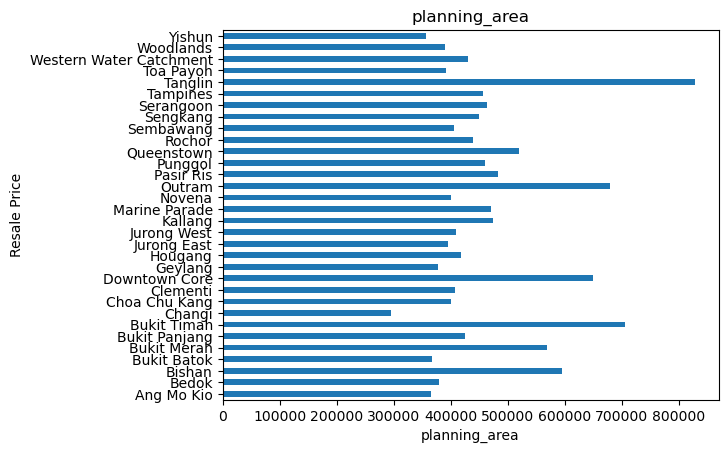

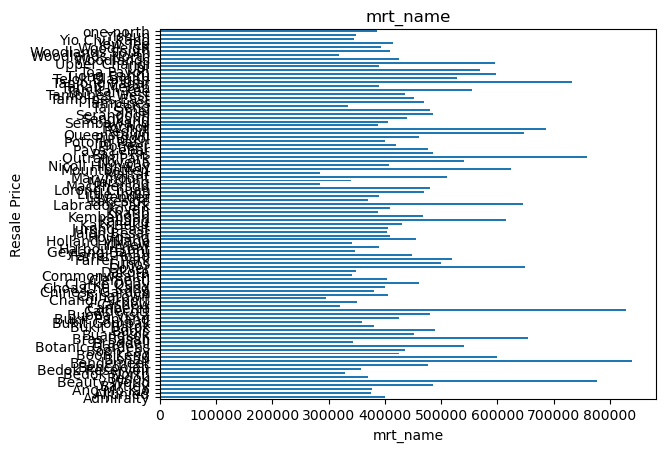

In [60]:
# find out relationship between categorical values and sales price
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['resale_price'].median().plot.barh()
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(feature)
    plt.show()

**Observation**:
1. Some of the categorical variables has too many unique values. This can be addressed with grouping them into suitable groups
    * I will group flat_model, flat_model, full_flat_type into flat_type for the model training. Although downstream details will be interesting for visualizations, keeping all the details for ML will introduce multicollinearity  
    * I will group town, postal, and planning_area, mrt_name into districts. Districts is a higher predictor than the downstream details 
3. the existence of precinct_pavilion do not have a significant effect on resale price 
    * I will drop this variable

In [61]:
df = df.drop(columns = ['precinct_pavilion'])
df_pred = df_pred.drop(columns = ['precinct_pavilion'])

## Exploratory Data Visualizations
Based on observations of market information and personal research, I had established the following hypothesis on the key factors affecting the resale price of a HDB flat:
1. Accessibility: Time taken includes time to walk to the nearest MRT station, and the travel time between the nearest MRT station and Raffles Place MRT station.
2. Proximity to facilities: Proximity of the HDB flat to facilities such as primary school and shopping malls.
3. Town in which the flat is located in: The more mature the town in which the flat is located in, the higher the resale price.

**In this section, I will:**
1. Explore correlations
2. Find out the relationship with different features
    - Continuous
        - floor_area_sqm
        - remaining_lease_years
        - mid (middle value of storey range)
    - Categorical
        - town / planning area
        - flat type 
        - flat model
        
    - Bonus: by proximity to amenities
    

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_20735/349647597.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


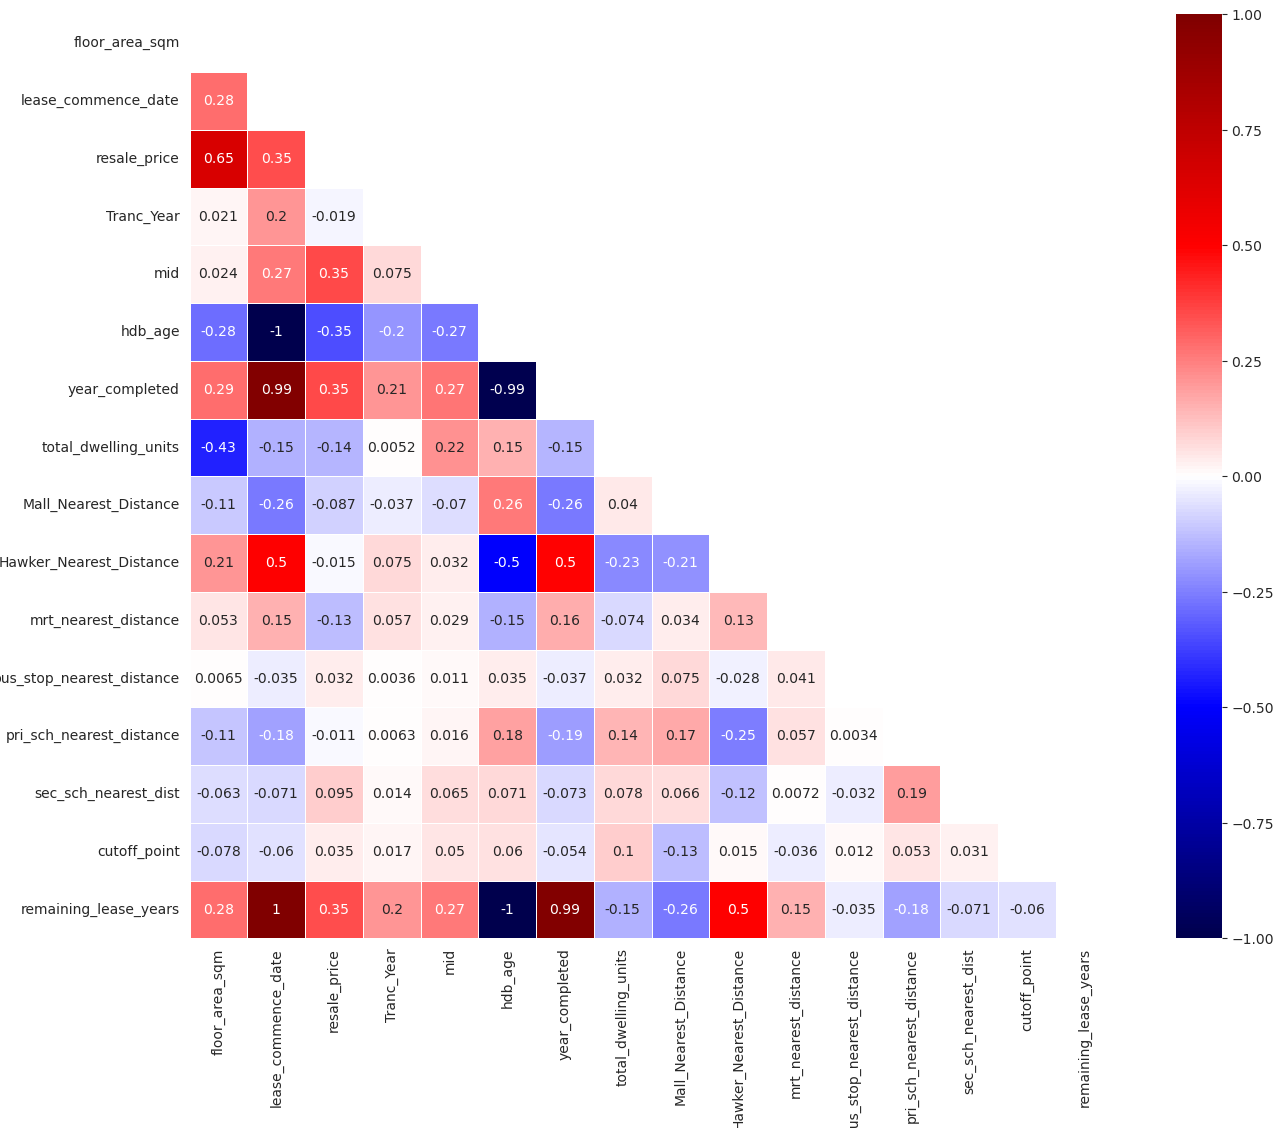

In [62]:
# Get correlation of the remaining features after cleaning
plt.figure(figsize = (16,12))

corr = df.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='seismic')

**Observations**:
1. High correlations are determined by the intensity of score (1 as most correlated) between the following variables that may suggest multicollinearity. It is hard to determine which features is more important, so we will find out more after the first round of modelling
    - year_completed and hdb_age
    - year_completed and lease_commence date
    - remaining_lease_years and lease_commence_date
    
2. Worth exploring the following features due to some corr shown with resale_price:
    - floor_area_sqm
    - remaining_lease_years
    - year_completed 
    - hdb_age
    - mid

3. Among the group of amenities (mall, bus stop, hawker, primary school, secondary school):
    - sec school has a higher correlation with resale_price than pri school. This goes against my initial assumption that parents will choose the location of HDB based on the primary school's location
        - to introduce an interaction term between sec school distance and cutoff_point during data pre-processing
    - for the rest of the amenities, the correlation with resale_price decreases from bus stop > hawker > mall > mrt
        - we can group them into groups (having 1 - 4 amenities within 500m vs those outside 500m)

### 1. By Town / Planning Area
First, I will find the relationship of HDB resale price by town and planning area.

In [63]:
# group by town to median resale_price
by_town = df.groupby(['town'])['resale_price'].median().reset_index()

In [64]:
by_planning_area = df.groupby(['planning_area'])['resale_price'].median().reset_index()

Text(0.5, 1.0, 'HDB Median Resale Price by Town in the past 10 years')

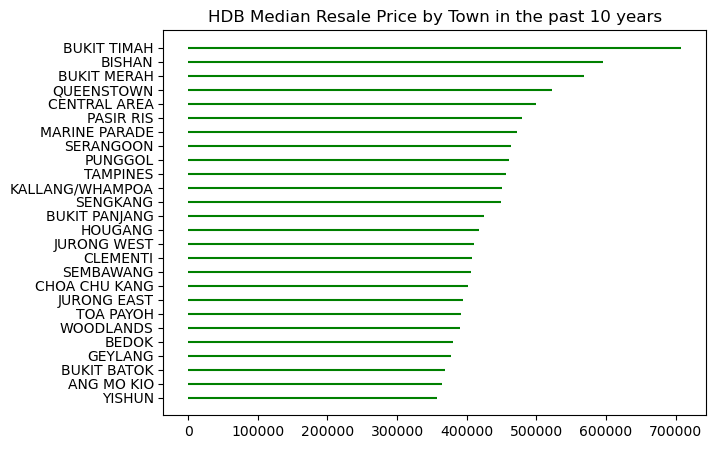

In [65]:
fig = plt.figure(figsize=(7,5))

ordered_price = by_town.sort_values(by='resale_price')
my_range=range(1,len(by_town.index)+1)
 
plt.hlines(y=my_range, xmin=0, xmax=ordered_price['resale_price'], color='green')
 
plt.yticks(my_range, ordered_price['town'])
plt.title("HDB Median Resale Price by Town in the past 10 years")

Text(0.5, 1.0, 'HDB Median Resale Price by Planning Area in the past 10 years')

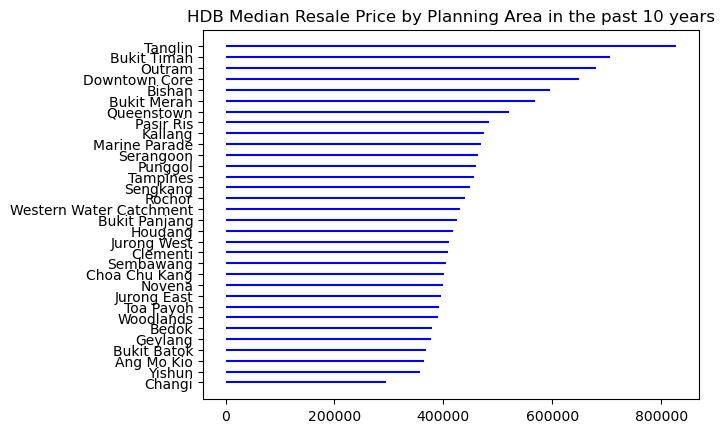

In [87]:
# fig = plt.figure(figsize=(7,5))

ordered_price = by_planning_area.sort_values(by='resale_price')
my_range=range(1,len(by_planning_area.index)+1)
 
plt.hlines(y=my_range, xmin=0, xmax=ordered_price['resale_price'], color='blue')
 
plt.yticks(my_range, ordered_price['planning_area'])
plt.title("HDB Median Resale Price by Planning Area in the past 10 years")

**Observation**: Without controlling the flat type, HDB resale flats of town and planning areas are roughly the same. I will drop planning area (the higher amount of variables), and keep town for further grouping

### 2. By Flat Type

In [67]:
by_type = df.groupby(['flat_type'])['resale_price'].median().sort_values().reset_index()

Text(0.5, 1.0, 'Resale prices in the past decade by flat type')

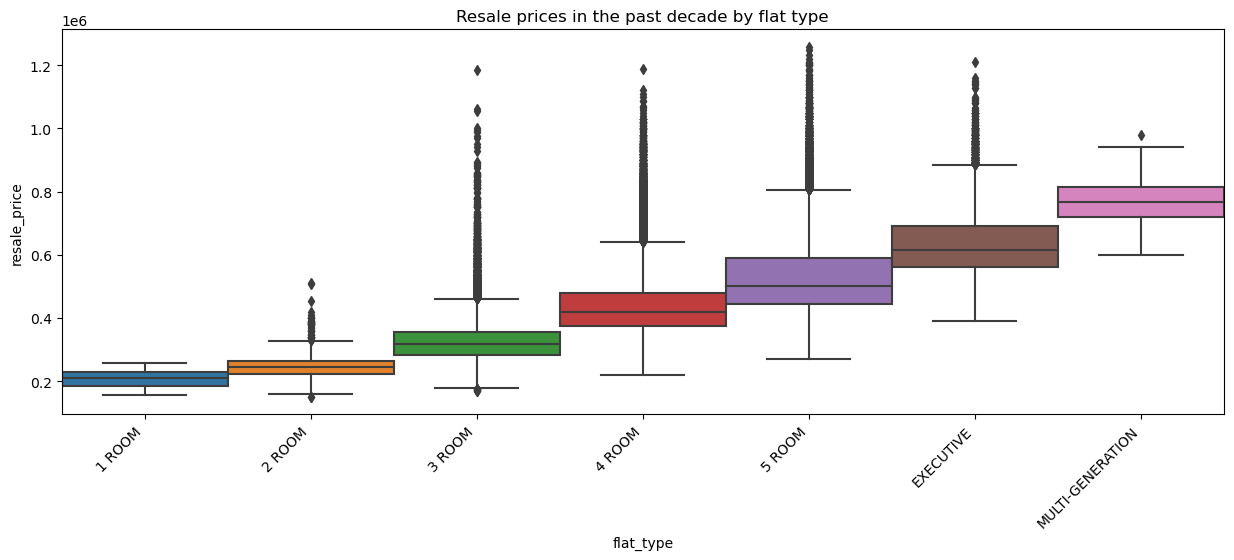

In [68]:
plt.figure(figsize=(15,5))
fig = sns.boxplot(x='flat_type', y='resale_price', order = by_type['flat_type'], data=df, width=1)
fig.set_xticklabels(labels=by_type['flat_type'],rotation=45, ha='right')
plt.title('Resale prices in the past decade by flat type')

**Observation**: Most of the outliers are for bigger flat types - notably 3-room, 4-room and 5-room, which has a long tail.

### 3. By Flat Model

In [69]:
# group by flat_model
by_model = df.groupby(['flat_model'])['resale_price'].median().sort_values().reset_index()

Text(0.5, 1.0, 'Resale prices in the past decade by flat model')

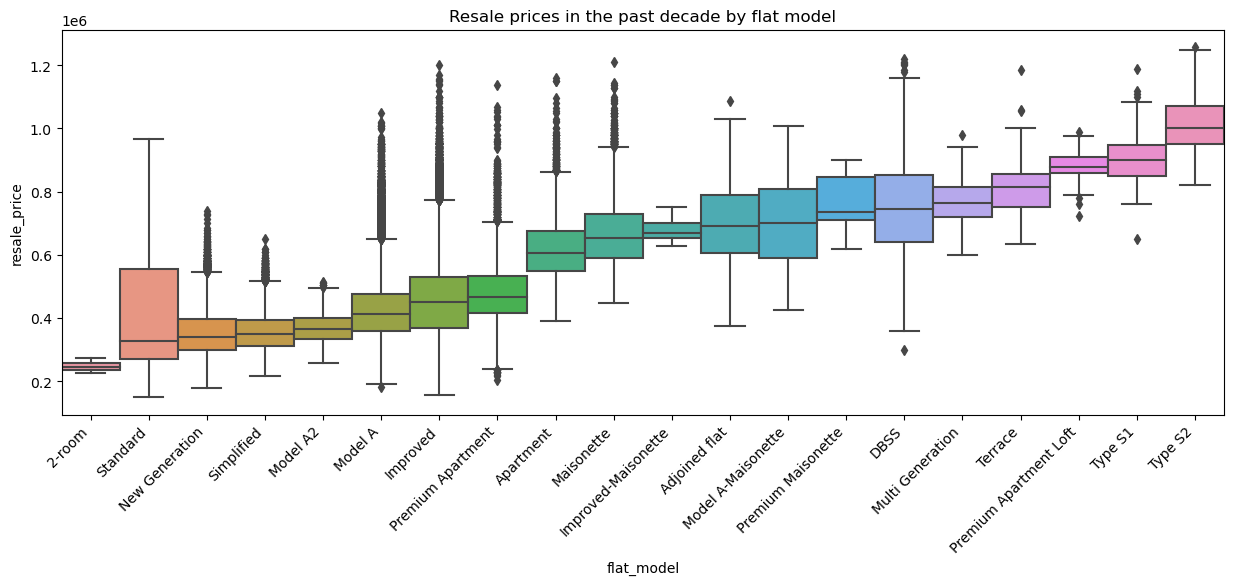

In [70]:
plt.figure(figsize=(15,5))
fig = sns.boxplot(x='flat_model', y='resale_price', order = by_model['flat_model'], data=df, width=1)
fig.set_xticklabels(labels=by_model['flat_model'],rotation=45, ha='right')
plt.title('Resale prices in the past decade by flat model')

**Observation**:Standard HDB model is the one without long-tail. Also, there are too many types of flat models that are similar in nature. For example: terrace, adjoined flat, type S1, type S2, and DBSS are pretty rare compare to Standard HDB. I can  

### 4. By Storey Range

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_20735/773351098.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)


Text(0.5, 1.0, 'Resale Price by Middle storey of storey range')

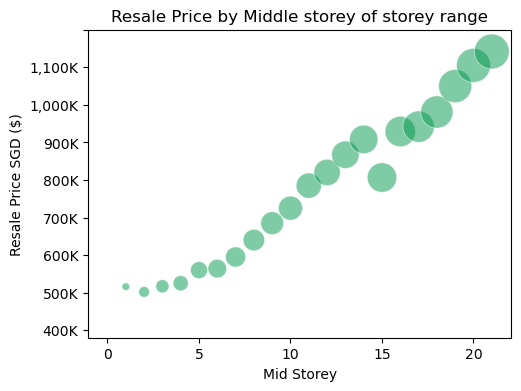

In [139]:
plt.figure(figsize=(12,4))

# group the resale price by story
ax1 = plt.subplot(121)
storey = by_mid.groupby('mid')['resale_price'].median().reset_index().sort_values(by='mid')
storey['mid'] = storey['mid'].astype('category').cat.codes # label encode
a=sns.scatterplot(x=storey['mid'], y=storey['resale_price'], s=storey['mid'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylim([280000,1100000]), ax1.set_ylabel('Resale Price SGD ($)'), ax1.set_xlabel('Mid Storey')
ax1.set_title('Resale Price by Middle storey of storey range')


**Observation**: There is a linear relationship between storey height and resale prices (except for floor 15)

### 5. By Floor Area (in square meter)

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_20735/1884350272.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_yticklabels(ylabels)


Text(0.5, 1.0, 'Resale price in the past decade by Floor Area (sqm)')

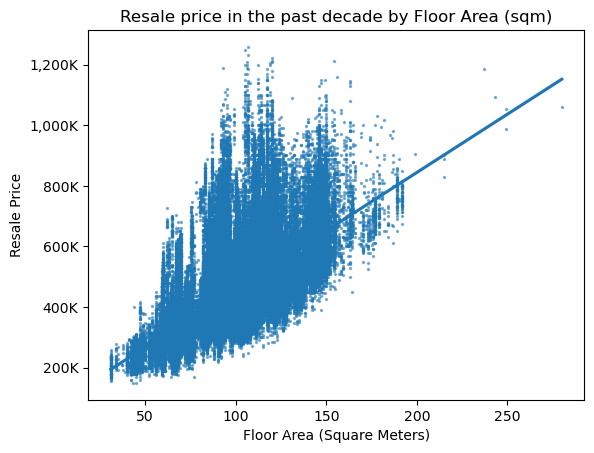

In [89]:
plt=sns.regplot(x='floor_area_sqm', y='resale_price', data=df, scatter_kws={"s": 2, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in plt.get_yticks()/1000]
plt.set_yticklabels(ylabels)
plt.set_ylabel('Resale Price')
plt.set_xlabel('Floor Area (Square Meters)')
plt.set_title('Resale price in the past decade by Floor Area (sqm)')

**Observation**: Majority of HDB are within 50-200 sqm in terms of size. The range of HDB resale prices is the highest among 100-150 sqm in size.

### 6. By Remaining Lease Years

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_20735/48389174.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Resale Price By Remaining Lease Years')

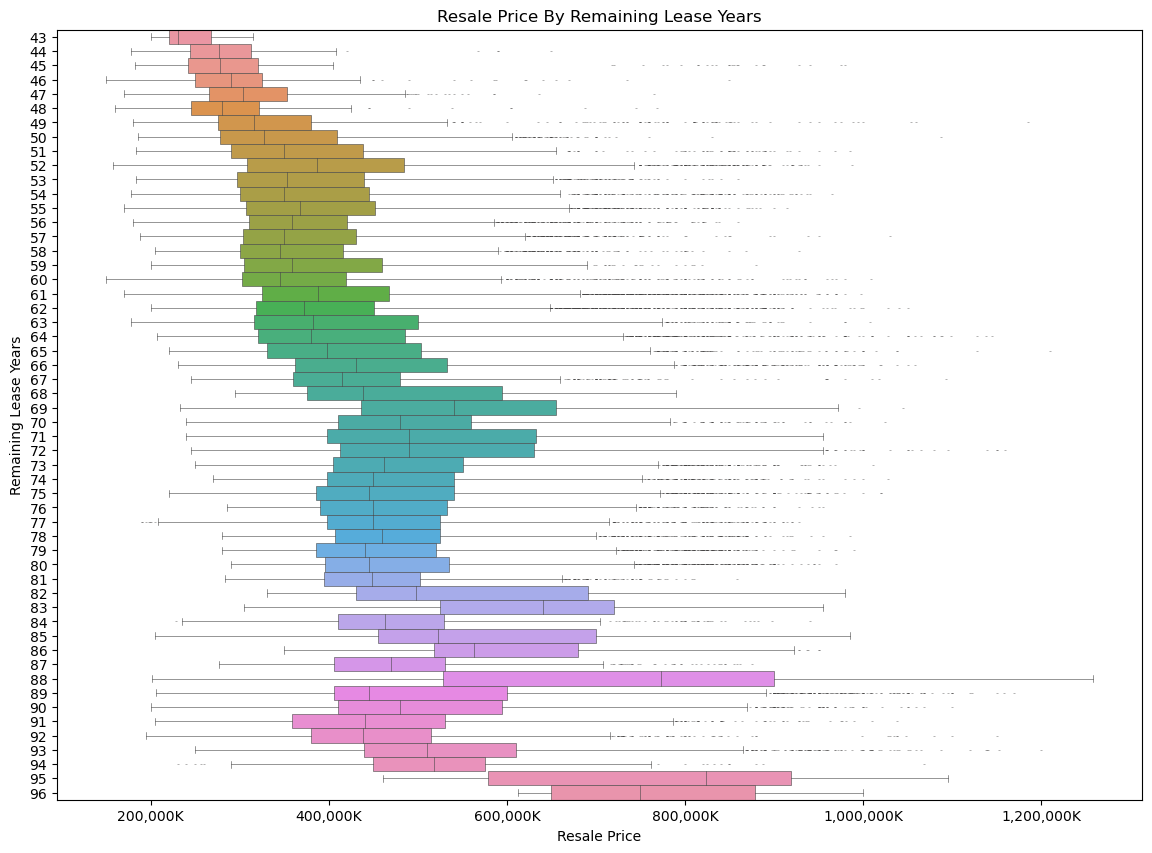

In [156]:
plt.figure(figsize=(14,10))

plt=sns.boxplot(y='remaining_lease_years', x='resale_price', data=df, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
plt.set_xlabel('Resale Price'), plt.set_ylabel('Remaining Lease Years')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in plt.get_xticks()]
plt.set_xticklabels(xlabels)
plt.set_title('Resale Price By Remaining Lease Years')

**Observation**: The distribution of resale price varies according to the remaining lease years. Newer flats have a wider range of resale prices, and closer to the higher side of resale prices.

### 7.Outliers for Resale price
Find out whether resale_price (the dependent variable) has outliers, and how it is distributed by a few different features such as flat types and town.


{'whiskers': [<matplotlib.lines.Line2D at 0x17874cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17875e430>,
 'boxes': [<matplotlib.lines.Line2D at 0x17874cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x17875e970>],
 'fliers': [<matplotlib.lines.Line2D at 0x17875ec10>],
 'means': []}

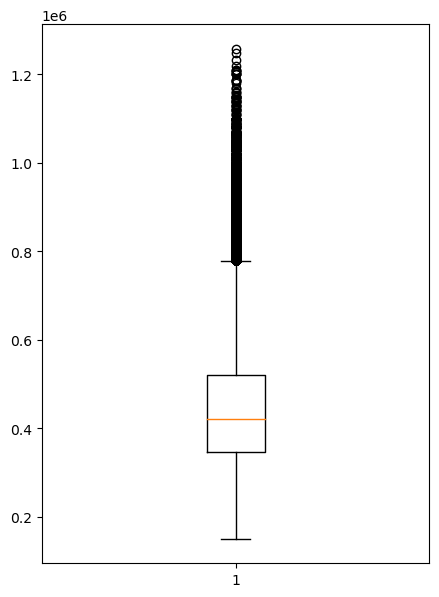

In [76]:
# plot a boxplot of resale_price data: 

import matplotlib.pyplot as plt

plt.figure(figsize = (5,7))
plt.boxplot(data=df, x='resale_price')

In [77]:
df.describe()

floor_area_sqm  lease_commence_date  resale_price     Tranc_Year  \
count    150634.00000        150634.000000  1.506340e+05  150634.000000   
mean         97.19763          1992.448464  4.491615e+05    2016.489551   
std          24.40304            12.138829  1.433076e+05       2.752396   
min          31.00000          1966.000000  1.500000e+05    2012.000000   
25%          75.00000          1984.000000  3.470000e+05    2014.000000   
50%          95.00000          1992.000000  4.200000e+05    2017.000000   
75%         112.00000          2001.000000  5.200000e+05    2019.000000   
max         280.00000          2019.000000  1.258000e+06    2021.000000   

                 mid        hdb_age  year_completed  total_dwelling_units  \
count  150634.000000  150634.000000   150634.000000         150634.000000   
mean        8.284823      28.551536     1990.922906            124.683312   
std         5.508074      12.138829       12.202185             58.349670   
min         2.000000       2.000000     1949.000000              2.000000   
25%         5.000000      20.000000     1983.000000             90.000000   
50%         8.000000      29.000000     1989.000000            112.000000   
75%        11.000000      37.000000     1999.000000            144.000000   
max        50.000000      55.000000     2018.000000            570.000000   

       Mall_Nearest_Distance  Hawker_Nearest_Distance  mrt_nearest_distance  \
count          150634.000000            150634.000000         150634.000000   
mean              663.901799              1173.700148            765.007872   
std               367.751216              1076.701337            429.366039   
min                 0.000000                 1.873295             21.971410   
25%               392.328485               372.132398            458.266301   
50%               602.818388               778.966980            682.621343   
75%               866.941448              1678.949229            975.734180   
max              3496.402910              4907.036414           3544.504228   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
count              150634.000000             150634.000000   
mean                  115.258966                395.172974   
std                    55.572855                234.760931   
min                     9.001285                 45.668324   
25%                    75.032491                227.083163   
50%                   107.765999                348.876691   
75%                   146.652409                502.179385   
max                   443.964584               3305.841039   

       sec_sch_nearest_dist   cutoff_point  remaining_lease_years  
count         150634.000000  150634.000000          150634.000000  
mean             508.533220     210.146428              69.448464  
std              309.066265      20.010489              12.138829  
min               38.913475     188.000000              43.000000  
25%              290.285883     188.000000              61.000000  
50%              447.377670     208.000000              69.000000  
75%              644.284099     224.000000              78.000000  
max             3638.977233     260.000000              96.000000

In [78]:
# find the IQR of the boxplot

# find the lower bound
q1_resale_price = 347000
q3_resale_price = 520000
IQR_resale_price = q3_resale_price - q1_resale_price
print(f' IQR: {IQR_resale_price}')

# find the upper bound value 
right_quartile = q3_resale_price + (1.5*IQR_resale_price)
print(f' Upper bound: {right_quartile}')

 IQR: 173000
 Upper bound: 779500.0


In [79]:
# find the number of outliers beyond the upper bound value
outliers = df.loc[df['resale_price'] > 779500]

In [80]:
outliers.shape

(5220, 27)

In [81]:
outliers.Tranc_Year.value_counts()

# among the top 5 outliers, most of the outliers fell within 2019 period onwards

2018    821
2020    789
2017    681
2019    667
2016    501
2021    453
2015    392
2013    370
2012    291
2014    255
Name: Tranc_Year, dtype: int64

In [82]:
# which town has the most outliers
outliers.town.value_counts()

BUKIT MERAH        904
QUEENSTOWN         763
BISHAN             556
TOA PAYOH          554
CENTRAL AREA       372
KALLANG/WHAMPOA    370
ANG MO KIO         258
CLEMENTI           249
GEYLANG            179
MARINE PARADE      156
SERANGOON          148
BUKIT TIMAH        143
BEDOK              134
TAMPINES           130
HOUGANG            120
JURONG EAST         60
WOODLANDS           48
PASIR RIS           20
BUKIT BATOK         19
YISHUN              13
PUNGGOL             12
BUKIT PANJANG        7
CHOA CHU KANG        4
JURONG WEST          1
Name: town, dtype: int64

Text(0.5, 1.0, 'Outlier HDB Resale Flats (with price higher than $779k)')

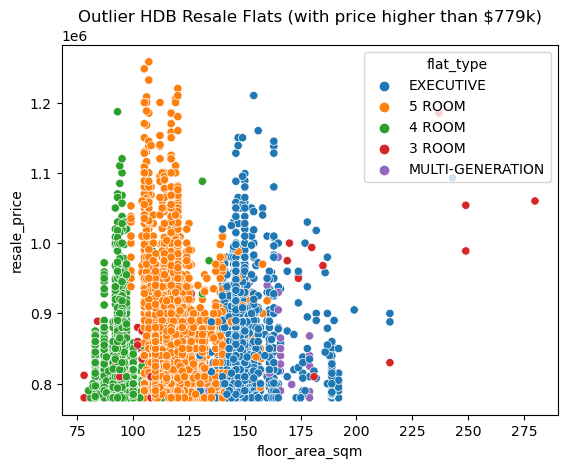

In [83]:
# find out if there's any relationship between outliers and flat_type
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=outliers, hue='flat_type', legend='brief', label=None)
plt.title('Outlier HDB Resale Flats (with price higher than $779k)')

**Observations**:
1. From the earlier plot, price of HDB has increased since 2019. A large proportio of the outliers fell within 2019 period onwards
2. Also, the outliers are mostly in towns such as Bukit Merah, Queenstown, Bishan, Toa Payoh, and Central Area.
3. There is some information between resale price, and the size of the HDB
    - bigger flat types such as 4R, 5R, and Executive flats
    - the outliers for 3R flats are more random
4. Even though outliers can skew the predictions, the values shown here are important information and capture the trends of the HDB resale price. I will keep them for analysis purposes

In [84]:
# export the new df into csv
df.to_csv('./datasets/clean_data.csv')

In [153]:
# export prediction data into csv
df_pred.to_csv('./datasets/clean_pred_data.csv')